In [1]:
import pandas as pd;
import matplotlib.pyplot as plt;
import numpy as np;
import seaborn as sns;
import missingno as msno;
from sklearn.model_selection import train_test_split
import plotly.express as px
from collections import Counter
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)

from mlxtend.evaluate import mcnemar_table,mcnemar_tables
from mlxtend.plotting import checkerboard_plot
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
import squarify
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder


In [2]:
income=pd.read_csv("C:/TMLC/PROJECT 2/Dataset/Income.csv")

In [3]:
income.shape

(209499, 43)

In [4]:
income.head()

ID  age   gender               education                class  \
0  ID_TZ0000   79   Female    High school graduate                  NaN   
1  ID_TZ0001   65   Female    High school graduate                  NaN   
2  ID_TZ0002   21     Male   12th grade no diploma   Federal government   
3  ID_TZ0003    2   Female                Children                  NaN   
4  ID_TZ0004   70     Male    High school graduate                  NaN   

  education_institute                    marital_status  \
0                 NaN                           Widowed   
1                 NaN                           Widowed   
2                 NaN                     Never married   
3                 NaN                     Never married   
4                 NaN   Married-civilian spouse present   

                         race is_hispanic      employment_commitment  ...  \
0                       White   All other         Not in labor force  ...   
1                       White   All other   Children or Armed Forces  ...   
2                       Black   All other   Children or Armed Forces  ...   
3   Asian or Pacific Islander   All other   Children or Armed Forces  ...   
4                       White   All other         Not in labor force  ...   

  country_of_birth_mother  migration_code_change_in_msa  \
0                      US                             ?   
1                      US                     unchanged   
2                      US                     unchanged   
3                   India                     unchanged   
4                      US                             ?   

   migration_prev_sunbelt migration_code_move_within_reg  \
0                       ?                              ?   
1                     NaN                      unchanged   
2                     NaN                      unchanged   
3                     NaN                      unchanged   
4                       ?                              ?   

   migration_code_change_in_reg  residence_1_year_ago old_residence_reg  \
0                             ?                   NaN               NaN   
1                     unchanged                  Same               NaN   
2                     unchanged                  Same               NaN   
3                     unchanged                  Same               NaN   
4                             ?                   NaN               NaN   

   old_residence_state importance_of_record  income_above_limit  
0                  NaN              1779.74         Below limit  
1                  NaN              2366.75         Below limit  
2                  NaN              1693.42         Below limit  
3                  NaN              1380.27         Below limit  
4                  NaN              1580.79         Below limit  

[5 rows x 43 columns]

In [5]:
income.sample(5)

ID  age   gender                    education  \
43873   ID_TZ138623   48     Male   Some college but no degree   
145655    ID_TZ4196   13   Female                     Children   
158059   ID_TZ53236    1     Male                     Children   
178908    ID_TZ7219   18     Male         High school graduate   
124234   ID_TZ22486   16     Male                    9th grade   

                              class education_institute  marital_status  \
43873    Self-employed-incorporated                 NaN        Divorced   
145655                          NaN                 NaN   Never married   
158059                          NaN                 NaN   Never married   
178908                      Private                 NaN   Never married   
124234                 Never worked         High school   Never married   

                              race is_hispanic      employment_commitment  \
43873                        White   All other   Children or Armed Forces   
145655   Asian or Pacific Islander   All other   Children or Armed Forces   
158059                       White   All other   Children or Armed Forces   
178908                       White   All other   Children or Armed Forces   
124234                       White   All other   Children or Armed Forces   

        ... country_of_birth_mother  migration_code_change_in_msa  \
43873   ...                       ?                     unchanged   
145655  ...             Philippines                             ?   
158059  ...                      US                             ?   
178908  ...                      US                     unchanged   
124234  ...                      US                     unchanged   

        migration_prev_sunbelt migration_code_move_within_reg  \
43873                      NaN                      unchanged   
145655                       ?                              ?   
158059                       ?                              ?   
178908                     NaN                      unchanged   
124234                     NaN                      unchanged   

        migration_code_change_in_reg  residence_1_year_ago old_residence_reg  \
43873                      unchanged                  Same               NaN   
145655                             ?                   NaN               NaN   
158059                             ?                   NaN               NaN   
178908                     unchanged                  Same               NaN   
124234                     unchanged                  Same               NaN   

        old_residence_state importance_of_record  income_above_limit  
43873                   NaN              2340.70         Below limit  
145655                  NaN              2662.17         Below limit  
158059                  NaN               465.70         Below limit  
178908                  NaN              1750.46         Below limit  
124234                  NaN              1400.66         Below limit  

[5 rows x 43 columns]

In [6]:
income._get_numeric_data()

age  employment_stat  wage_per_hour  working_week_per_year  \
0        79                0              0                     52   
1        65                0              0                      0   
2        21                0            500                     15   
3         2                0              0                      0   
4        70                0              0                      0   
...     ...              ...            ...                    ...   
209494   16                0              0                      0   
209495   78                0              0                      0   
209496    8                0              0                      0   
209497   26                0            700                     52   
209498   19                0              0                      8   

        industry_code  occupation_code  total_employed  vet_benefit  gains  \
0                   0                0               2            2      0   
1                   0                0               0            2      0   
2                  41               26               4            2      0   
3                   0                0               0            0      0   
4                   0                0               0            2      0   
...               ...              ...             ...          ...    ...   
209494              0                0               0            2      0   
209495              0                0               0            2      0   
209496              0                0               0            0      0   
209497             32               42               4            2      0   
209498             50               26               6            2      0   

        losses  stocks_status  mig_year  importance_of_record  
0            0            292        95               1779.74  
1            0              0        94               2366.75  
2            0              0        94               1693.42  
3            0              0        94               1380.27  
4            0              0        95               1580.79  
...        ...            ...       ...                   ...  
209494       0              0        95               2170.60  
209495       0             71        95               1029.57  
209496       0              0        95                791.61  
209497       0              0        94               3530.26  
209498       0              0        94               1987.72  

[209499 rows x 13 columns]

In [7]:
income.columns

Index(['ID', 'age', 'gender', 'education', 'class', 'education_institute',
       'marital_status', 'race', 'is_hispanic', 'employment_commitment',
       'unemployment_reason', 'employment_stat', 'wage_per_hour',
       'is_labor_union', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'occupation_code_main',
       'total_employed', 'household_stat', 'household_summary',
       'under_18_family', 'veterans_admin_questionnaire', 'vet_benefit',
       'tax_status', 'gains', 'losses', 'stocks_status', 'citizenship',
       'mig_year', 'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state', 'importance_of_record',
       'income_above_limit'],
      dtype='object')

# <span style="font-family:cursive;text-align:center">📊 Exploratory Data Analysis</span>

Text(0, 0.5, 'Frequency')

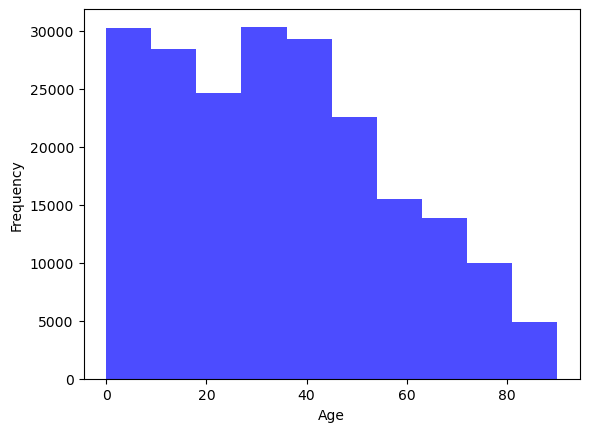

In [8]:
fig, ax=plt.subplots()

ax.hist(income['age'], bins=10, color='blue', alpha=0.7)
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')

In [9]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [10]:
income.dtypes

ID                                 object
age                                 int64
gender                             object
education                          object
class                              object
education_institute                object
marital_status                     object
race                               object
is_hispanic                        object
employment_commitment              object
unemployment_reason                object
employment_stat                     int64
wage_per_hour                       int64
is_labor_union                     object
working_week_per_year               int64
industry_code                       int64
industry_code_main                 object
occupation_code                     int64
occupation_code_main               object
total_employed                      int64
household_stat                     object
household_summary                  object
under_18_family                    object
veterans_admin_questionnaire      

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'employment_stat'}>,
        <Axes: title={'center': 'wage_per_hour'}>,
        <Axes: title={'center': 'working_week_per_year'}>],
       [<Axes: title={'center': 'industry_code'}>,
        <Axes: title={'center': 'occupation_code'}>,
        <Axes: title={'center': 'total_employed'}>,
        <Axes: title={'center': 'vet_benefit'}>],
       [<Axes: title={'center': 'gains'}>,
        <Axes: title={'center': 'losses'}>,
        <Axes: title={'center': 'stocks_status'}>,
        <Axes: title={'center': 'mig_year'}>],
       [<Axes: title={'center': 'importance_of_record'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

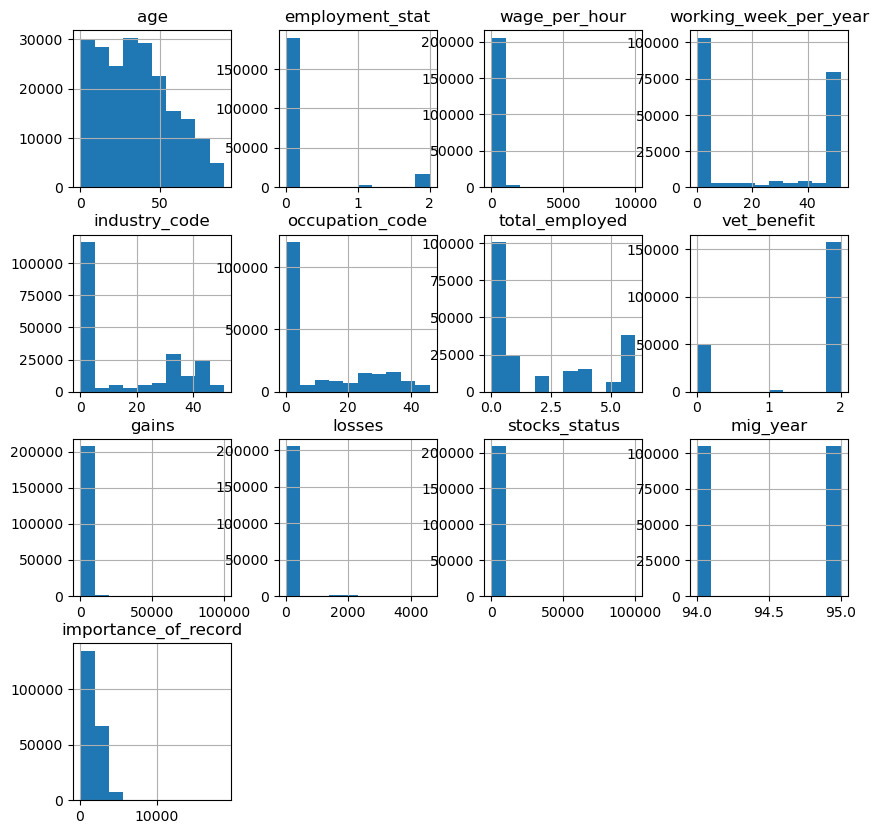

In [11]:
income.hist(figsize=(10,10))

In [12]:
income.describe()

age  employment_stat  wage_per_hour  working_week_per_year  \
count  209499.000000    209499.000000  209499.000000          209499.000000   
mean       34.518728         0.176760      55.433487              23.158850   
std        22.306738         0.555562     276.757327              24.397963   
min         0.000000         0.000000       0.000000               0.000000   
25%        15.000000         0.000000       0.000000               0.000000   
50%        33.000000         0.000000       0.000000               8.000000   
75%        50.000000         0.000000       0.000000              52.000000   
max        90.000000         2.000000    9999.000000              52.000000   

       industry_code  occupation_code  total_employed    vet_benefit  \
count  209499.000000    209499.000000   209499.000000  209499.000000   
mean       15.332398        11.321734        1.956067       1.515854   
std        18.049655        14.460839        2.365154       0.850853   
min         0.000000         0.000000        0.000000       0.000000   
25%         0.000000         0.000000        0.000000       2.000000   
50%         0.000000         0.000000        1.000000       2.000000   
75%        33.000000        26.000000        4.000000       2.000000   
max        51.000000        46.000000        6.000000       2.000000   

               gains         losses  stocks_status       mig_year  \
count  209499.000000  209499.000000  209499.000000  209499.000000   
mean      435.926887      36.881737     194.533420      94.499745   
std      4696.359500     270.383302    1956.375501       0.500001   
min         0.000000       0.000000       0.000000      94.000000   
25%         0.000000       0.000000       0.000000      94.000000   
50%         0.000000       0.000000       0.000000      94.000000   
75%         0.000000       0.000000       0.000000      95.000000   
max     99999.000000    4608.000000   99999.000000      95.000000   

       importance_of_record  
count         209499.000000  
mean            1740.888324  
std              995.559557  
min               37.870000  
25%             1061.290000  
50%             1617.040000  
75%             2185.480000  
max            18656.300000

In [13]:
income.describe(include='object')

ID   gender              education     class  \
count      209499   209499                 209499    104254   
unique     209499        2                     17         8   
top     ID_TZ0000   Female   High school graduate   Private   
freq            1   108784                  50627     75617   

       education_institute  marital_status    race is_hispanic  \
count                13302          209499  209499      209499   
unique                   2               7       5          10   
top            High school   Never married   White   All other   
freq                  7247           90723  175709      180404   

            employment_commitment unemployment_reason  ...  \
count                      209499                6520  ...   
unique                          8                   5  ...   
top      Children or Armed Forces     Other job loser  ...   
freq                       129789                2242  ...   

       country_of_birth_father country_of_birth_mother  \
count                   209499                  209499   
unique                      43                      43   
top                         US                      US   
freq                    166968                  168233   

       migration_code_change_in_msa migration_prev_sunbelt  \
count                        207911                 121047   
unique                            9                      3   
top                               ?                      ?   
freq                         104696                 104696   

       migration_code_move_within_reg migration_code_change_in_reg  \
count                          207911                       207911   
unique                              9                            8   
top                                 ?                            ?   
freq                           104696                       104696   

       residence_1_year_ago old_residence_reg old_residence_state  \
count                103215             16351               16351   
unique                    2                 5                  50   
top                    Same             South          California   
freq                  86864              5056                1849   

       income_above_limit  
count              209499  
unique                  2  
top           Below limit  
freq               196501  

[4 rows x 30 columns]

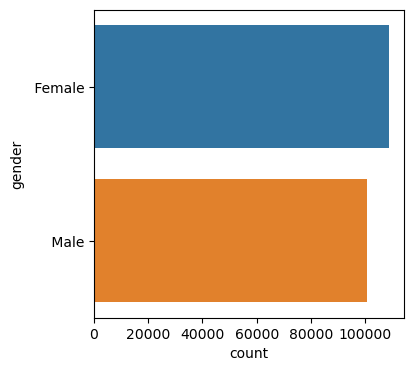

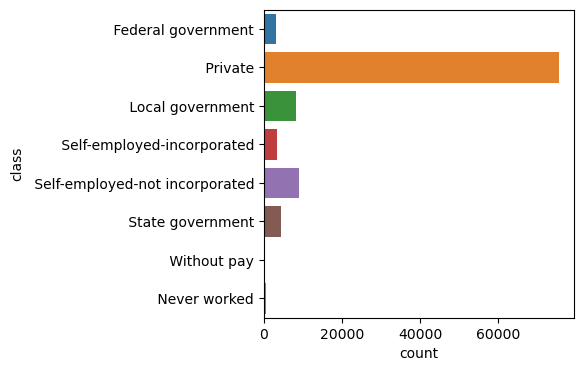

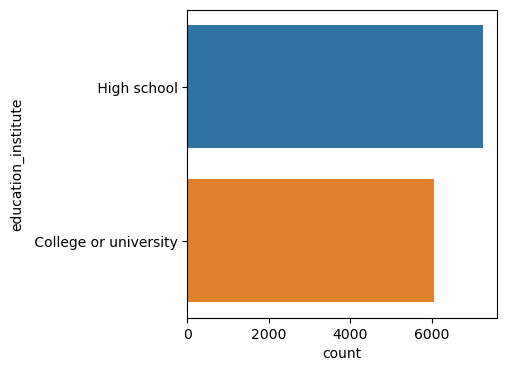

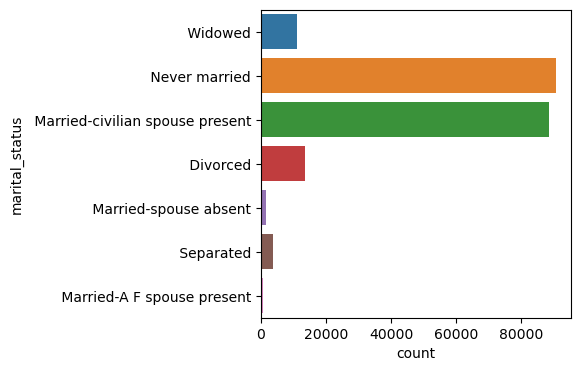

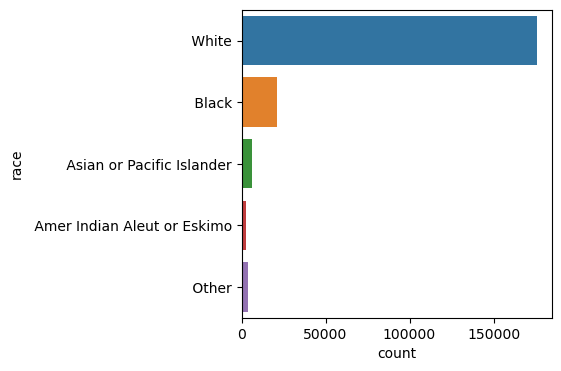

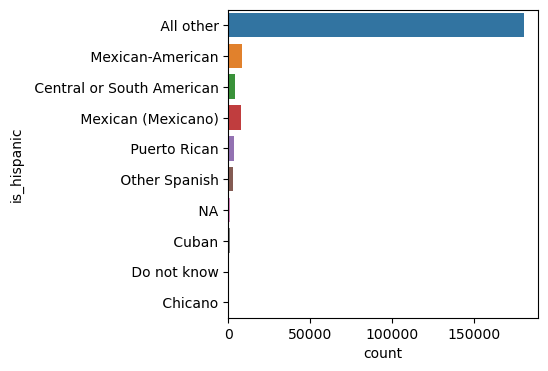

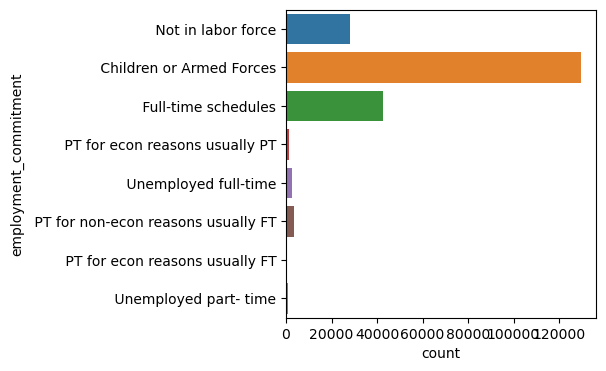

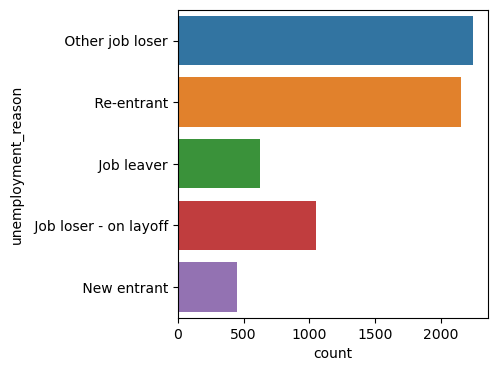

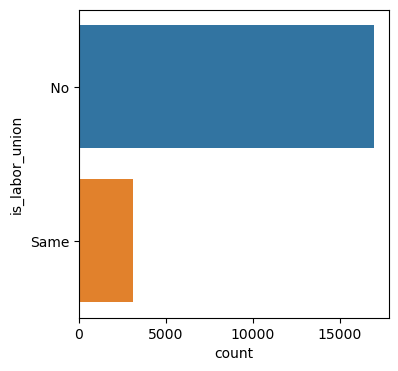

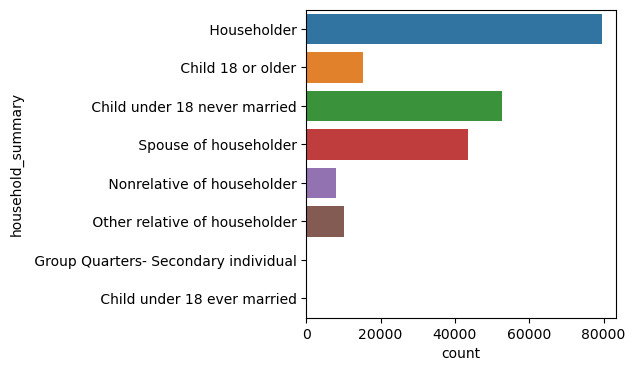

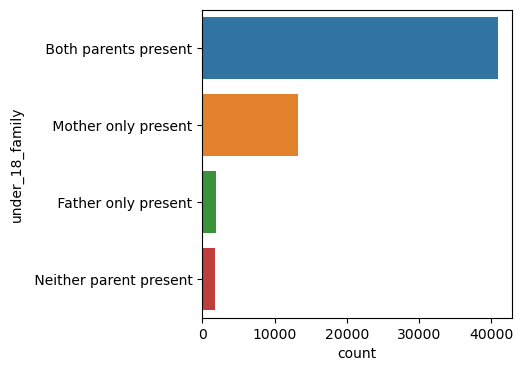

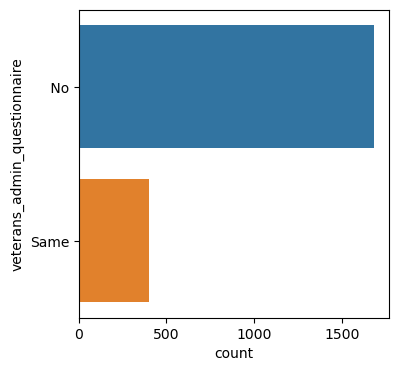

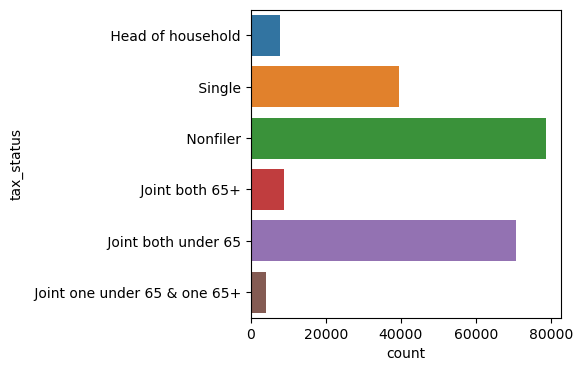

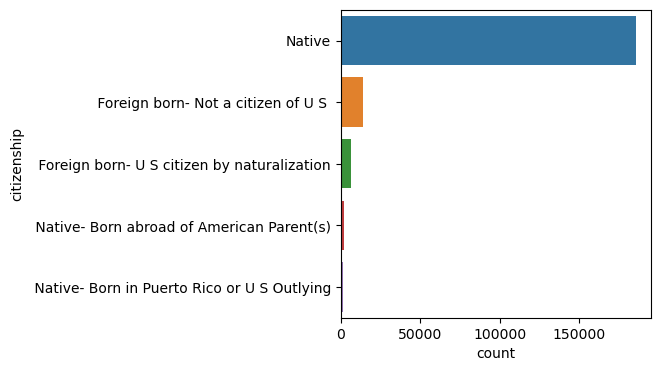

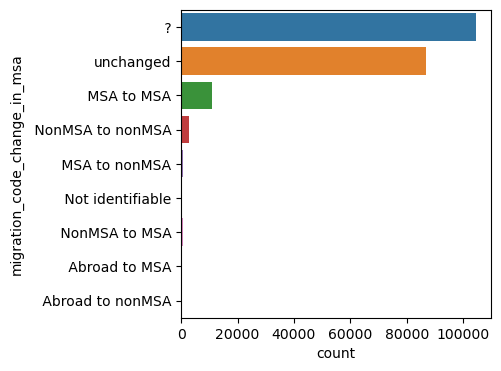

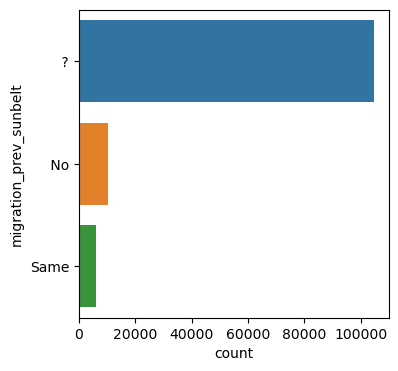

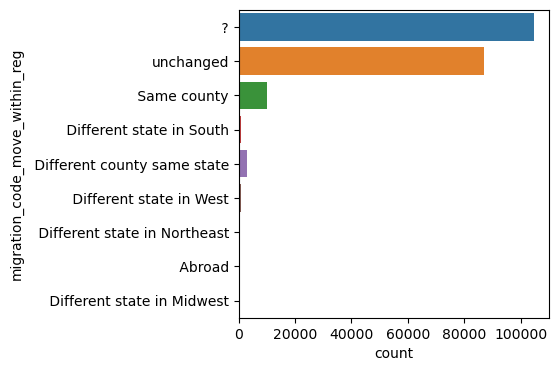

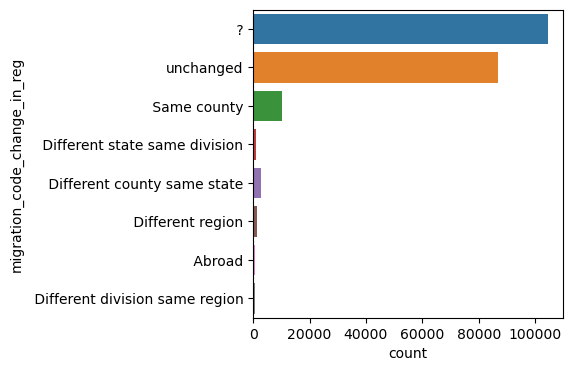

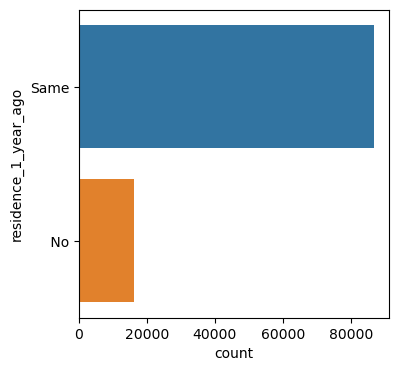

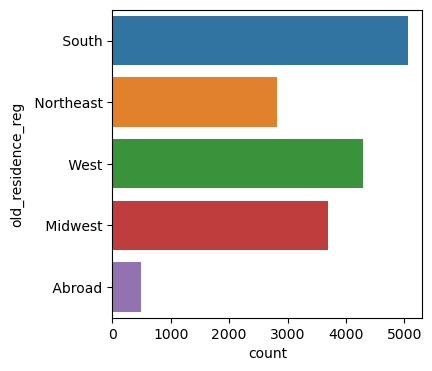

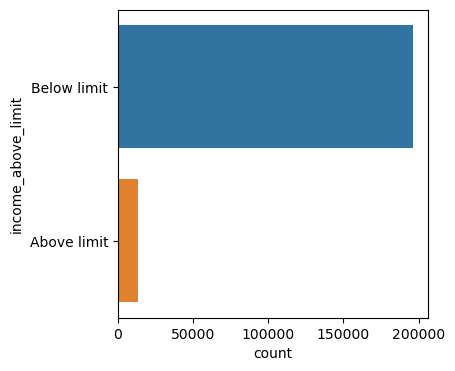

In [14]:
for col in income.select_dtypes(include='object'):
    if(income[col].nunique()<=10):
        plt.figure(figsize=(4, 4))
        sns.countplot(y=col, data=income)
        plt.show()

<Axes: xlabel='age', ylabel='income_above_limit'>

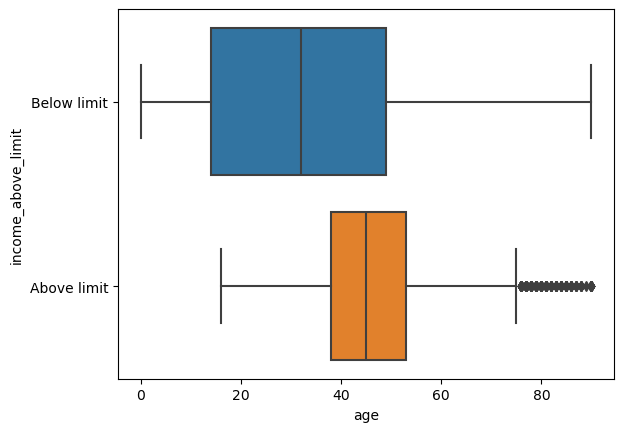

In [15]:
sns.boxplot(y=income['income_above_limit'], x=income['age'])

<Axes: xlabel='industry_code', ylabel='income_above_limit'>

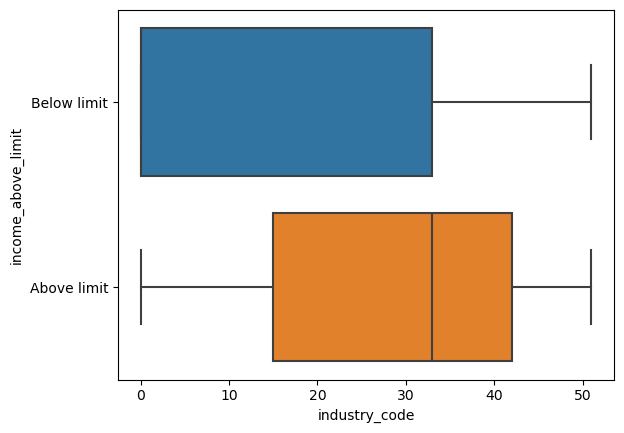

In [16]:
sns.boxplot(y=income['income_above_limit'], x=income['industry_code'])

<Axes: xlabel='occupation_code', ylabel='income_above_limit'>

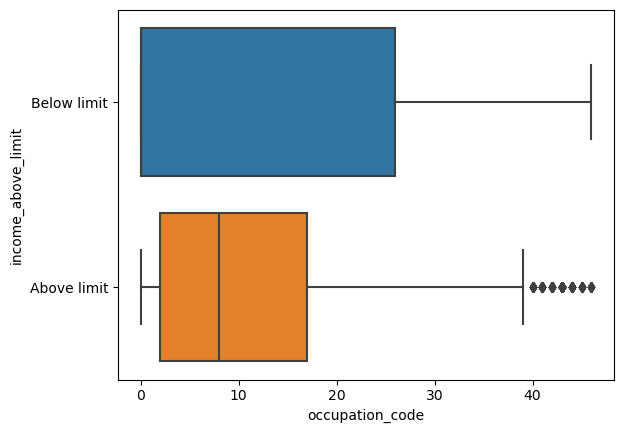

In [17]:
sns.boxplot(y=income['income_above_limit'], x=income['occupation_code'])


In [18]:
income.isna().sum()

ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

In [19]:
for i in income.columns:
    print(f"Unique values in {i} are: {income[i].nunique()}")

Unique values in ID are: 209499
Unique values in age are: 91
Unique values in gender are: 2
Unique values in education are: 17
Unique values in class are: 8
Unique values in education_institute are: 2
Unique values in marital_status are: 7
Unique values in race are: 5
Unique values in is_hispanic are: 10
Unique values in employment_commitment are: 8
Unique values in unemployment_reason are: 5
Unique values in employment_stat are: 3
Unique values in wage_per_hour are: 1232
Unique values in is_labor_union are: 2
Unique values in working_week_per_year are: 53
Unique values in industry_code are: 52
Unique values in industry_code_main are: 24
Unique values in occupation_code are: 47
Unique values in occupation_code_main are: 14
Unique values in total_employed are: 7
Unique values in household_stat are: 38
Unique values in household_summary are: 8
Unique values in under_18_family are: 4
Unique values in veterans_admin_questionnaire are: 2
Unique values in vet_benefit are: 3
Unique values in 

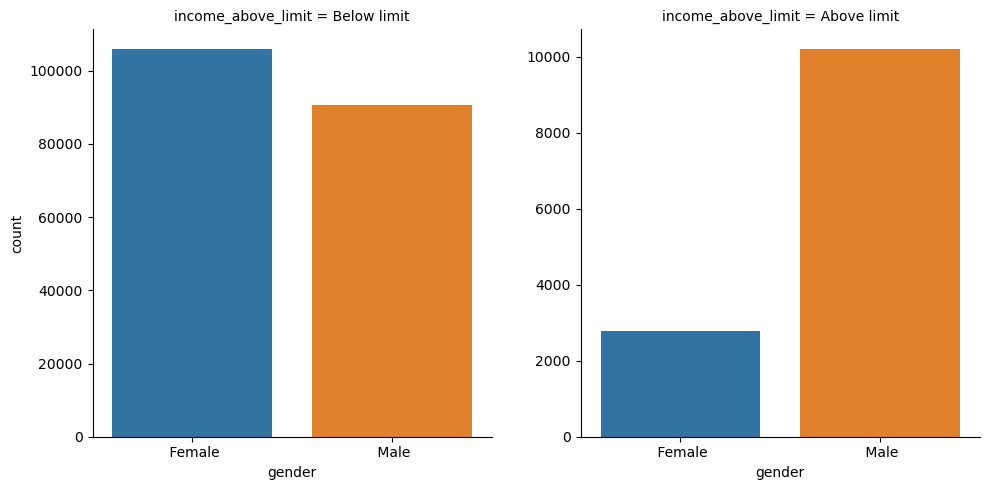

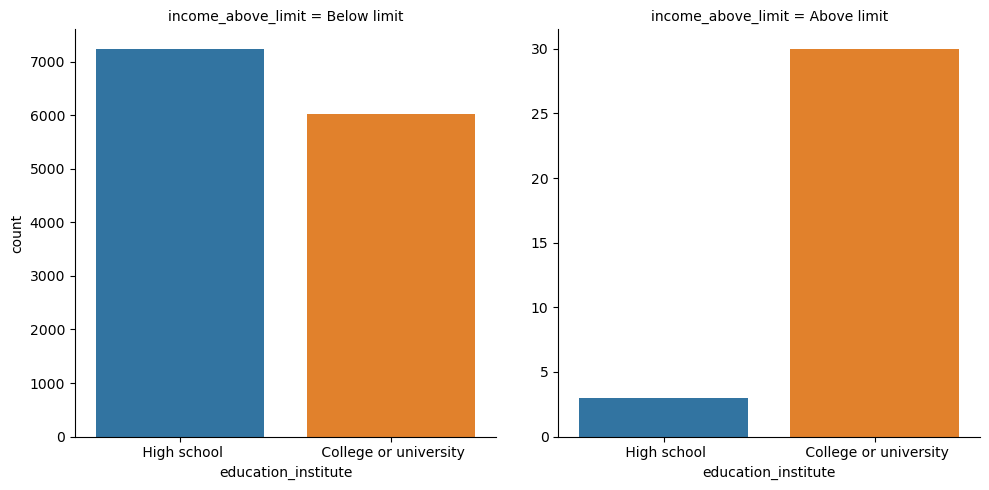

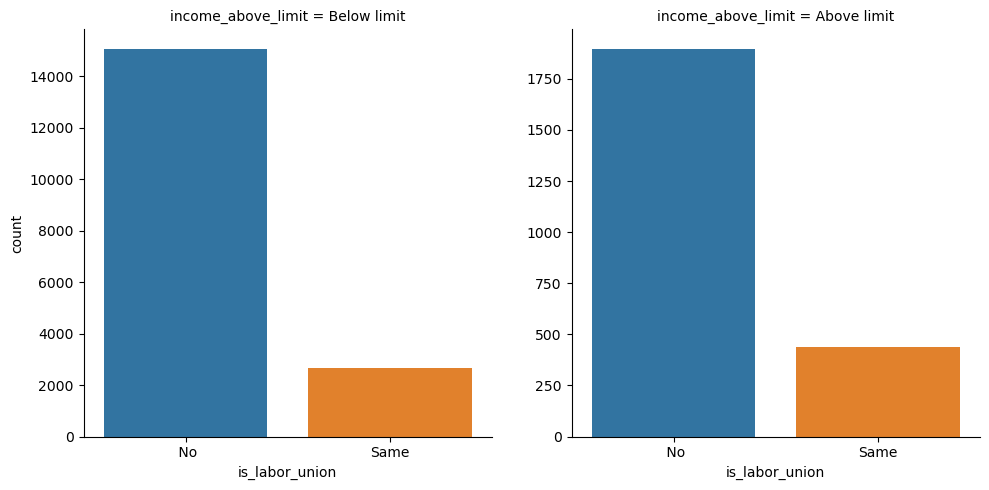

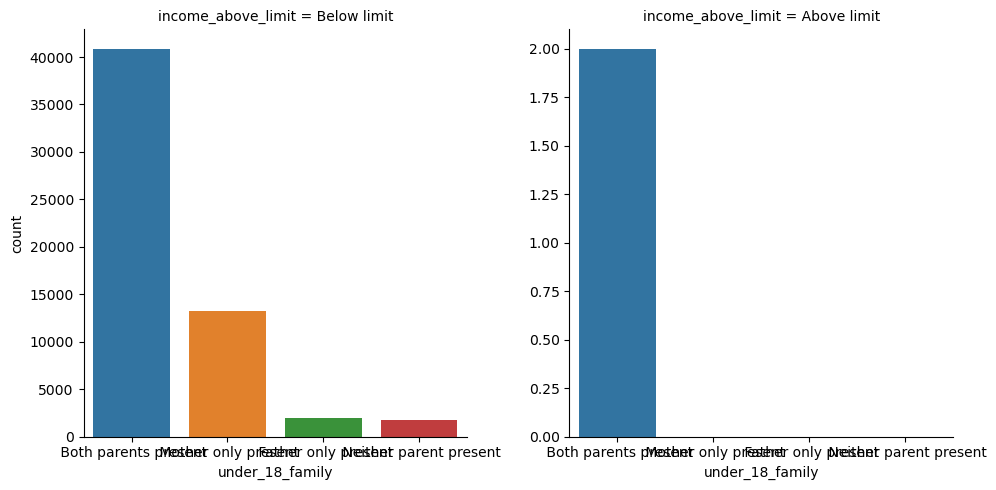

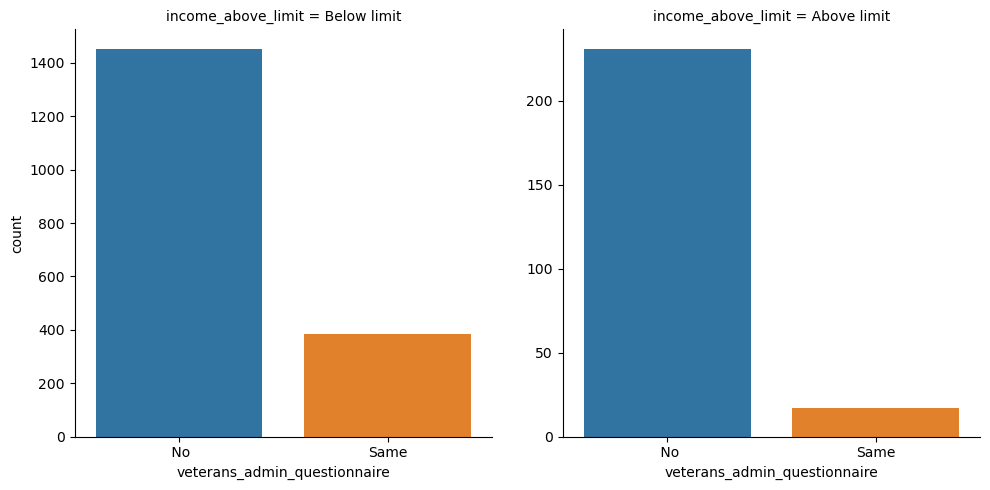

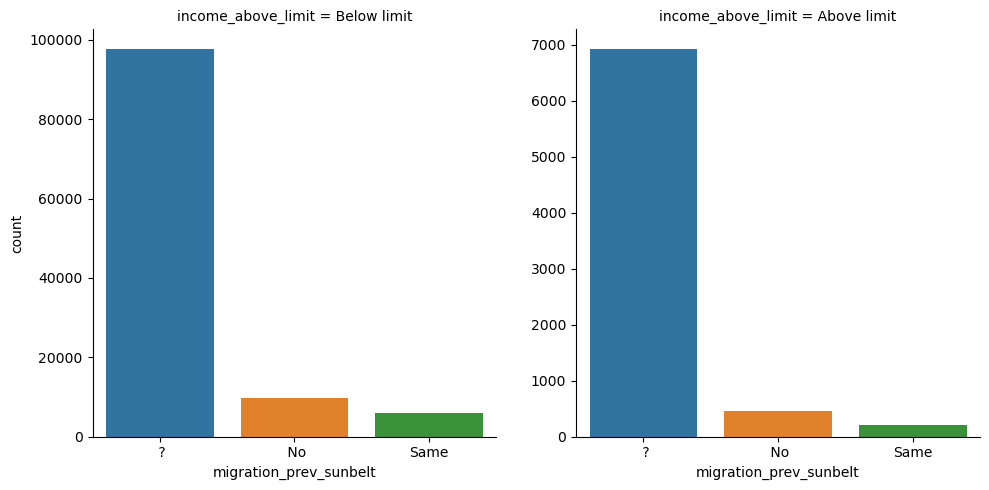

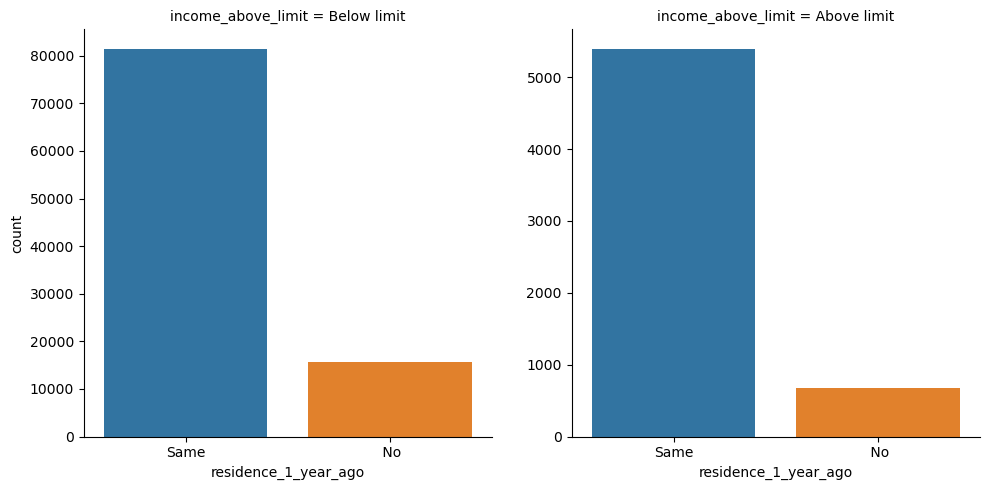

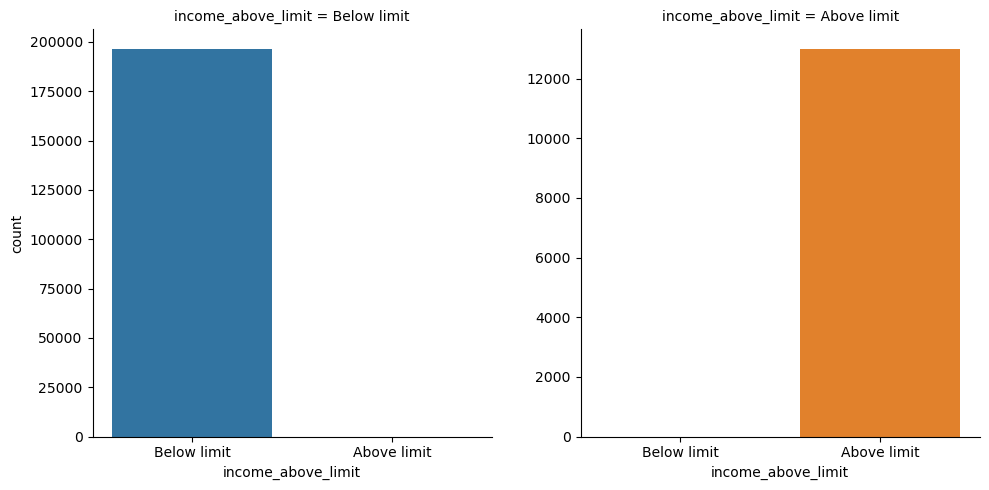

In [20]:
for col in income.select_dtypes(include='object'):
    if(income[col].nunique() <= 4):
        g=sns.catplot(x=col, kind='count', col='income_above_limit', data=income, sharey=False)

In [21]:
fig=px.treemap(income, path=['income_above_limit'], width=800, height=400)
fig.update_layout(
    margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [22]:
round((income.isna().sum() / income.shape[0]) * 100, 2).astype(str) + ' %'   #shows the emty percentage of each column

ID                                  0.0 %
age                                 0.0 %
gender                              0.0 %
education                           0.0 %
class                             50.24 %
education_institute               93.65 %
marital_status                      0.0 %
race                                0.0 %
is_hispanic                         0.0 %
employment_commitment               0.0 %
unemployment_reason               96.89 %
employment_stat                     0.0 %
wage_per_hour                       0.0 %
is_labor_union                    90.42 %
working_week_per_year               0.0 %
industry_code                       0.0 %
industry_code_main                  0.0 %
occupation_code                     0.0 %
occupation_code_main              50.45 %
total_employed                      0.0 %
household_stat                      0.0 %
household_summary                   0.0 %
under_18_family                   72.39 %
veterans_admin_questionnaire      

In [23]:
income['income_above_limit'].value_counts()

income_above_limit
Below limit    196501
Above limit     12998
Name: count, dtype: int64

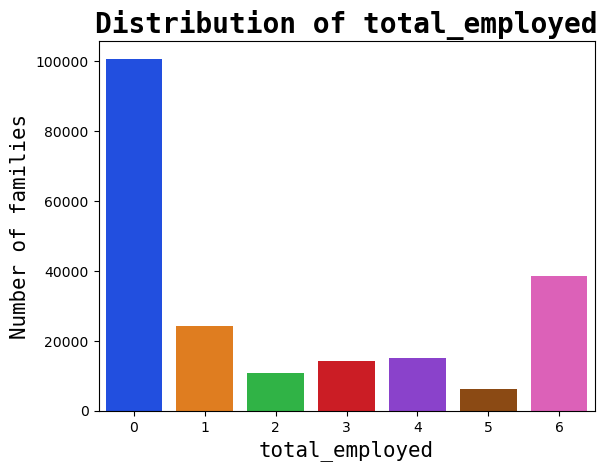

In [24]:
fig, axs=plt.subplots()

total_employed = income['total_employed'].value_counts()
sns.barplot(x=total_employed.index, y=total_employed.values, palette='bright', ax=axs)
axs.set_title('Distribution of total_employed', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axs.set_xlabel('total_employed', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs.set_ylabel('Number of families', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axs.tick_params(labelsize=10)

In [25]:
edu_df=income.copy(deep=True)
edu_df['education'].value_counts()

education
High school graduate                      50627
Children                                  49685
Some college but no degree                29320
Bachelors degree(BA AB BS)                20979
7th and 8th grade                          8438
10th grade                                 7905
11th grade                                 7260
Masters degree(MA MS MEng MEd MSW MBA)     6861
9th grade                                  6540
Associates degree-occup /vocational        5650
Associates degree-academic program         4494
5th or 6th grade                           3542
12th grade no diploma                      2282
1st 2nd 3rd or 4th grade                   1917
Prof school degree (MD DDS DVM LLB JD)     1852
Doctorate degree(PhD EdD)                  1318
Less than 1st grade                         829
Name: count, dtype: int64

In [26]:
edu_df['education'].unique()

array([' High school graduate', ' 12th grade no diploma', ' Children',
       ' Bachelors degree(BA AB BS)', ' 7th and 8th grade', ' 11th grade',
       ' 9th grade', ' Masters degree(MA MS MEng MEd MSW MBA)',
       ' 10th grade', ' Associates degree-academic program',
       ' 1st 2nd 3rd or 4th grade', ' Some college but no degree',
       ' Less than 1st grade', ' Associates degree-occup /vocational',
       ' Prof school degree (MD DDS DVM LLB JD)', ' 5th or 6th grade',
       ' Doctorate degree(PhD EdD)'], dtype=object)

<Axes: ylabel='education'>

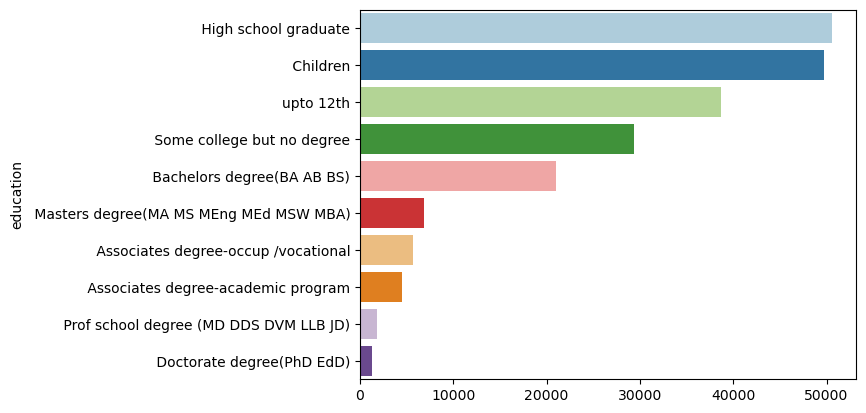

In [27]:
edu_df.replace({' 7th and 8th grade':'upto 12th',' Less than 1st grade':'upto 12th',' 1st 2nd 3rd or 4th grade':'upto 12th',
                ' 5th or 6th grade':'upto 12th',' 9th grade':'upto 12th',' 11th grade':'upto 12th',
                ' 10th grade':'upto 12th',' 12th grade no diploma':'upto 12th'},inplace=True)

edu = edu_df['education'].value_counts()
sns.barplot(x=edu.values, y=edu.index, palette='Paired')

In [28]:
print('Income below limit for people upto 12th:',len(edu_df.loc[(edu_df['education']=='upto 12th') & (edu_df['income_above_limit']=='Below limit')])/len(edu_df.loc[(edu_df['education']=='upto 12th')]) * 100, '%')
print('Income above limit for people upto 12th:',len(edu_df.loc[(edu_df['education']=='upto 12th') & (edu_df['income_above_limit']=='Above limit')])/len(edu_df.loc[(edu_df['education']=='upto 12th')]) * 100, '%')
#people below limit are mostly below 12th

Income below limit for people upto 12th: 99.111409604009 %
Income above limit for people upto 12th: 0.8885903959910109 %


In [29]:
print('Native citizenship having income below limit:',len(edu_df.loc[(edu_df['citizenship']=='Native') & (edu_df['income_above_limit']=='Below limit')])/len(edu_df.loc[(edu_df['citizenship']=='Native')]) * 100, '%')
print('Non-Native citizenship having income below limit:',len(edu_df.loc[(edu_df['citizenship']!='Native') & (edu_df['income_above_limit']=='Below limit')])/len(edu_df.loc[(edu_df['citizenship']!='Native')]) * 100, '%')
#citizenship does not impact income limit

Native citizenship having income below limit: 93.69307746581282 %
Non-Native citizenship having income below limit: 94.5950482584977 %


In [30]:
print('Employed more than 1 but income is below limit:',len(edu_df.loc[(edu_df['total_employed']>1) & (edu_df['income_above_limit']=='Below limit')])/len(edu_df.loc[(edu_df['total_employed']>1)]) * 100, '%')
print('Employed only 1 but income is below limit:',len(edu_df.loc[(edu_df['total_employed']==1) & (edu_df['income_above_limit']=='Below limit')])/len(edu_df.loc[(edu_df['total_employed']==1)]) * 100, '%')
print('None employed and income is below limit:',len(edu_df.loc[(edu_df['total_employed']==0) & (edu_df['income_above_limit']=='Below limit')])/len(edu_df.loc[(edu_df['total_employed']==0)]) * 100, '%')
#checking if number of employed impacts income limit

Employed more than 1 but income is below limit: 87.92360338172259 %
Employed only 1 but income is below limit: 91.140123988997 %
None employed and income is below limit: 99.36337994597172 %


In [31]:
print('People above income limit with more than 1 employed:',len(edu_df.loc[(edu_df['total_employed']>1) & (edu_df['income_above_limit']=='Above limit')]))
print('People above income limit with only 1 employed:',len(edu_df.loc[(edu_df['total_employed']==1) & (edu_df['income_above_limit']=='Above limit')]))

People above income limit with more than 1 employed:

 10199
People above income limit with only 1 employed: 2158


c:\Users\shrir\anaconda3\envs\Visioguide\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\shrir\anaconda3\envs\Visioguide\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\shrir\anaconda3\envs\Visioguide\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\shrir\anaconda3\envs\Visioguide\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



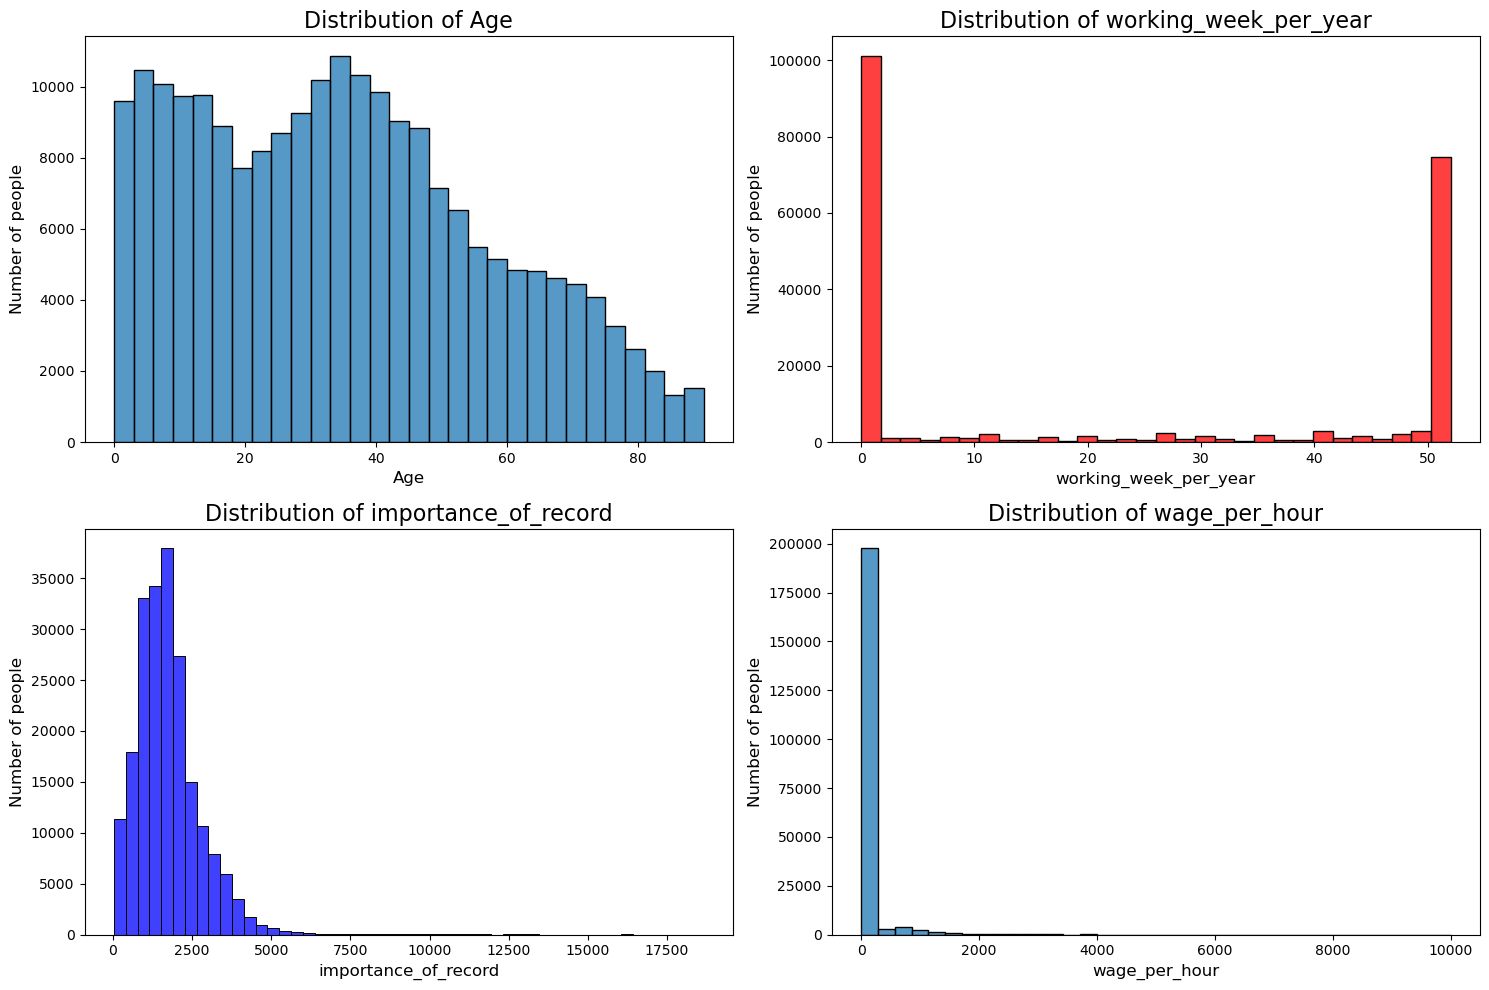

In [32]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot the distribution of Age
sns.histplot(income['age'], bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age', fontsize=16)
axes[0, 0].set_xlabel('Age', fontsize=12)
axes[0, 0].set_ylabel('Number of people', fontsize=12)

# Plot the distribution of working_week_per_year
sns.histplot(income['working_week_per_year'], bins=30, color='red', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of working_week_per_year', fontsize=16)
axes[0, 1].set_xlabel('working_week_per_year', fontsize=12)
axes[0, 1].set_ylabel('Number of people', fontsize=12)

# Plot the distribution of importance_of_record
sns.histplot(income['importance_of_record'], bins=50, color='blue', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of importance_of_record', fontsize=16)
axes[1, 0].set_xlabel('importance_of_record', fontsize=12)
axes[1, 0].set_ylabel('Number of people', fontsize=12)

# Plot the distribution of wage_per_hour
sns.histplot(income['wage_per_hour'], bins=35, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of wage_per_hour', fontsize=16)
axes[1, 1].set_xlabel('wage_per_hour', fontsize=12)
axes[1, 1].set_ylabel('Number of people', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()

In [33]:
#working week per year has peak at 0 concluding there are many children
#many people with wage less than 2000

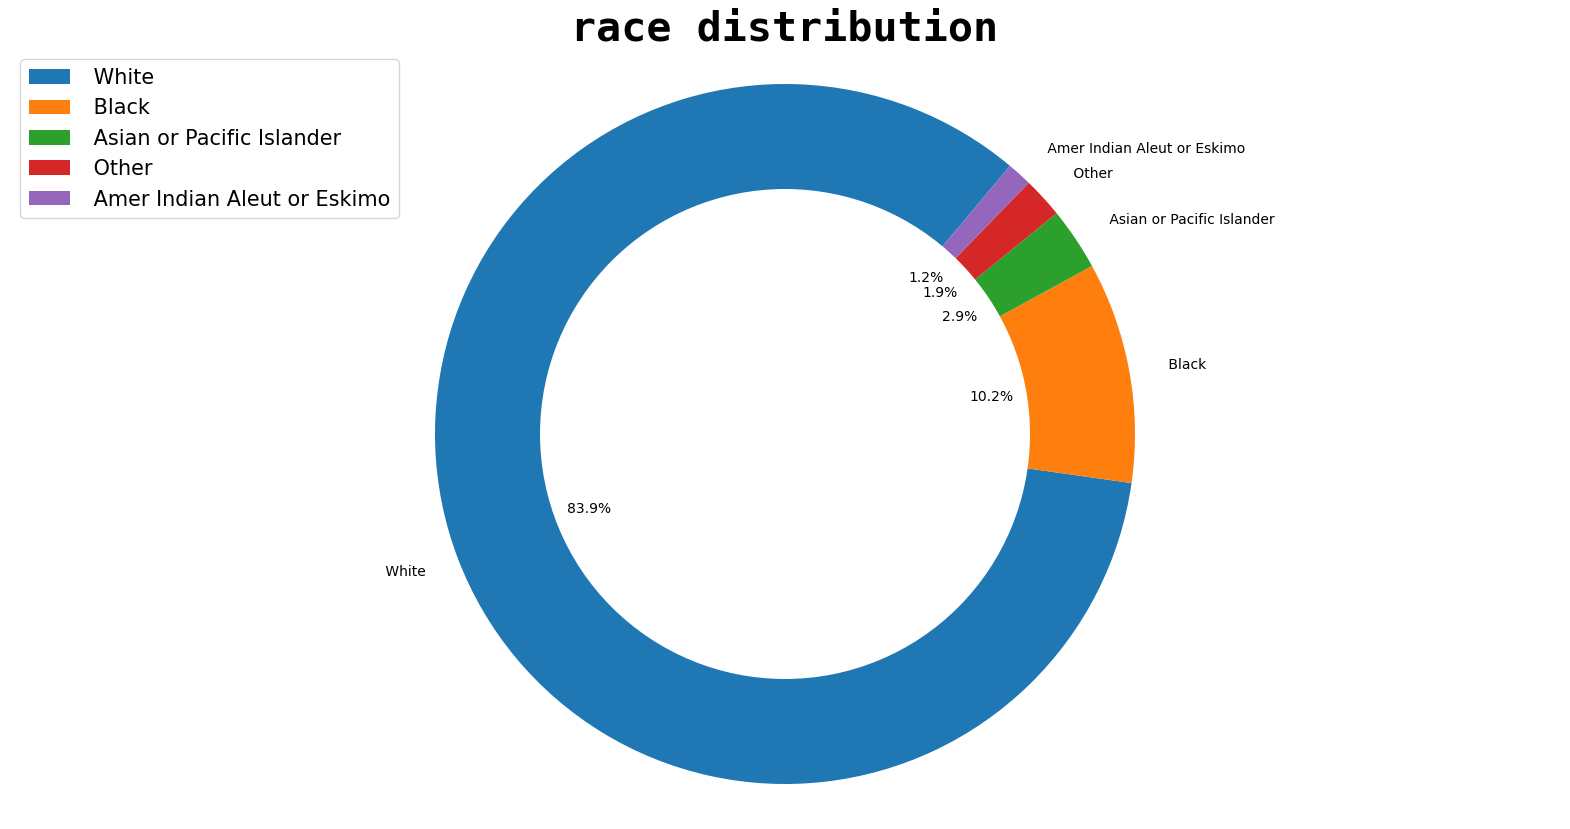

In [34]:
race = income['race'].value_counts()

plt.figure(figsize=(20, 10))
plt.pie(race.values, labels=race.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('race distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15},loc='upper left')
plt.show()

In [35]:
income['race'].unique()

array([' White', ' Black', ' Asian or Pacific Islander',
       ' Amer Indian Aleut or Eskimo', ' Other'], dtype=object)

In [36]:
print('Whites having income below limit:',len(income.loc[(income['race']==' White') & (income['income_above_limit']=='Below limit')])/len(income.loc[(income['race']==' White')]) * 100, '%')
print('Non-Whites having income below limit:',len(income.loc[(income['race']!=' White') & (income['income_above_limit']=='Below limit')])/len(income.loc[(income['race']!=' White')]) * 100, '%')
#checking if there is any race based discrimination->no discrimination

Whites having income below limit: 93.26272416324719 %
Non-Whites having income below limit: 96.56703166617342 %


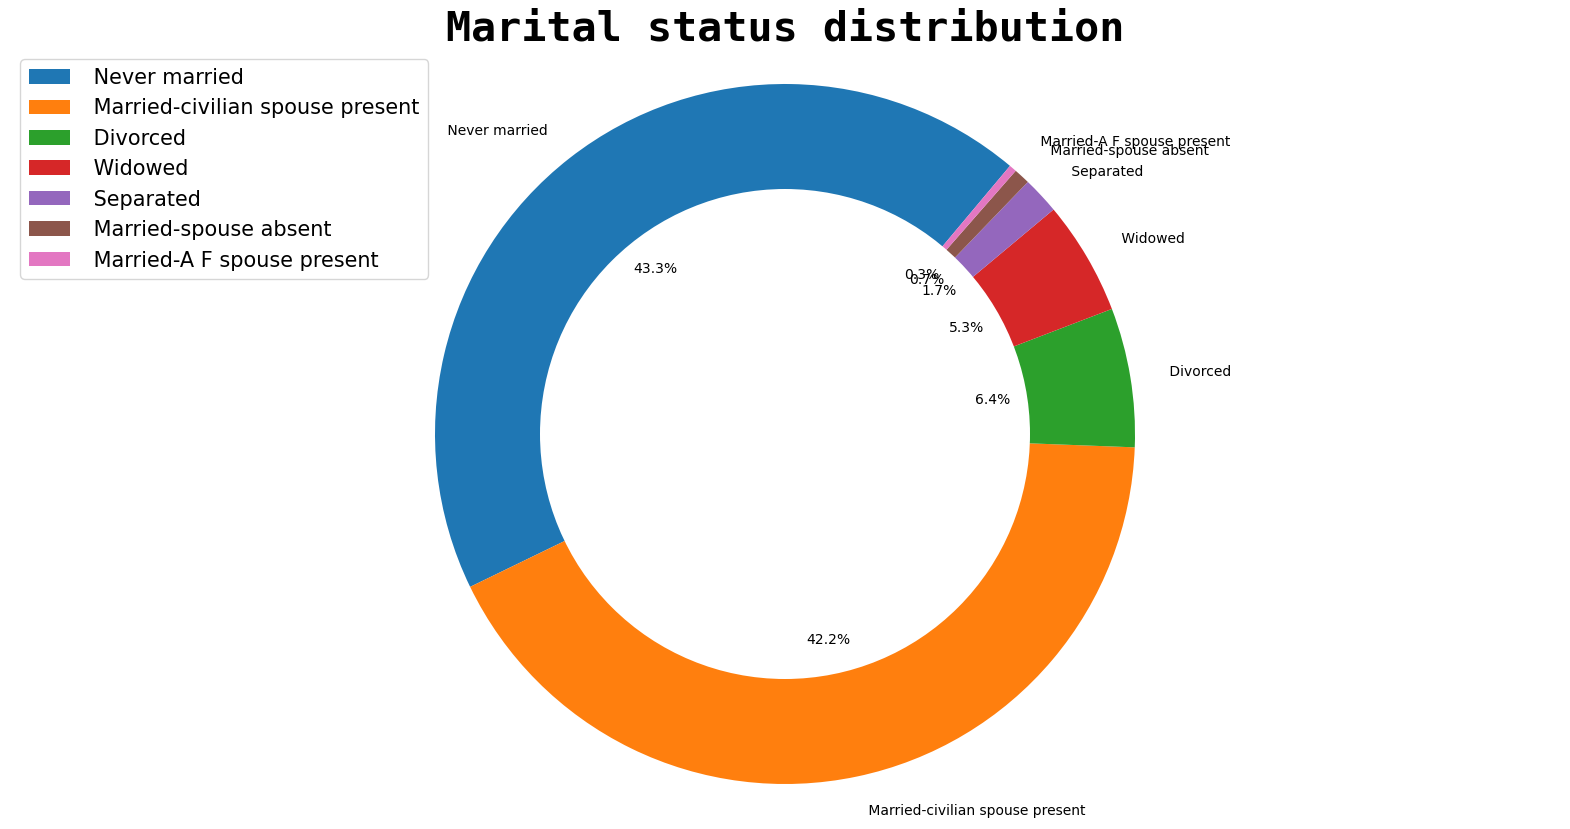

In [37]:
# Creating a donut chart for 'Marital status'
marital = income['marital_status'].value_counts()

plt.figure(figsize=(20, 10))
plt.pie(marital.values, labels=marital.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Marital status distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15},loc='upper left')
plt.show()

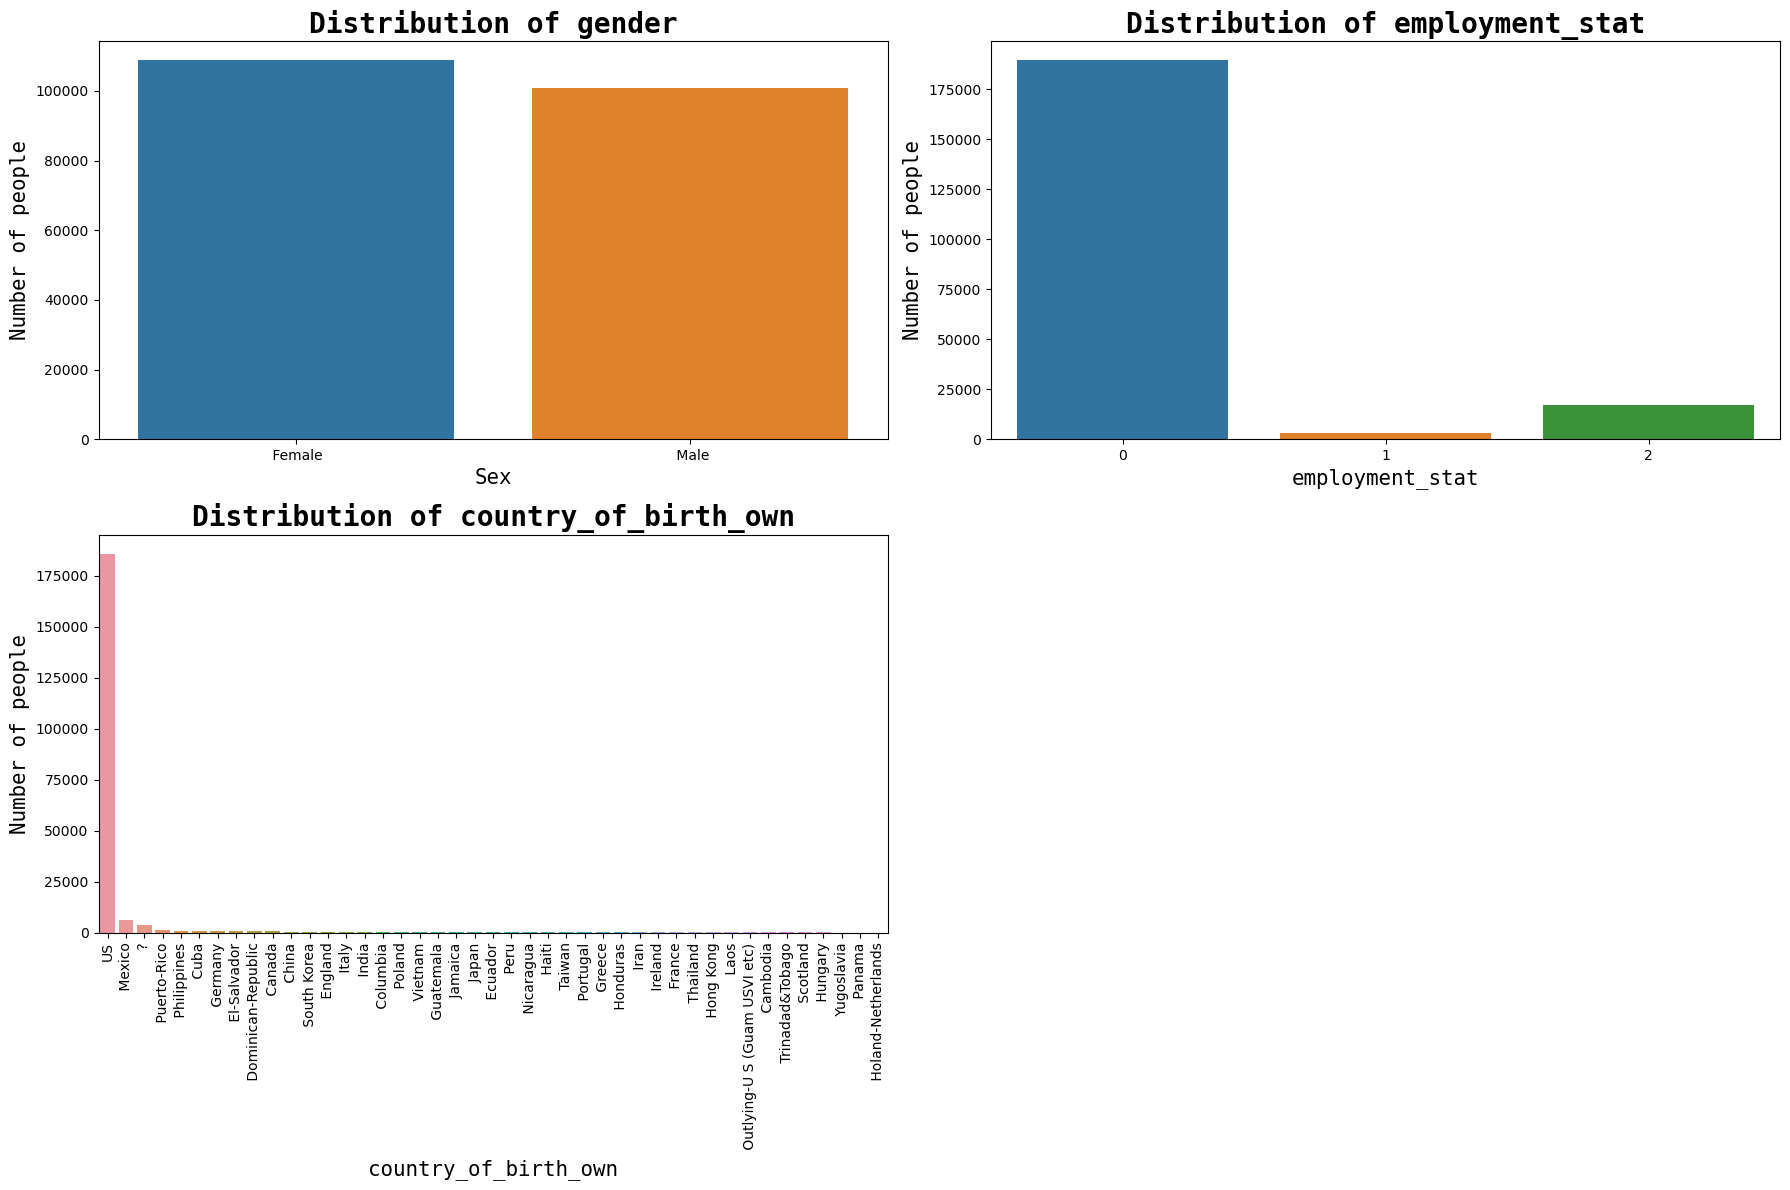

In [38]:
fig, axes = plt.subplots(2,2,figsize=(18, 12))

# Plot the distribution of gender
gender = income['gender'].value_counts()
sns.barplot(x=gender.index, y=gender.values, ax=axes[0,0])
axes[0,0].set_title('Distribution of gender', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axes[0,0].set_xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[0,0].set_ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[0,0].tick_params(labelsize=10)

# Plot the distribution of employment_stat
employment_stat = income['employment_stat'].value_counts()
sns.barplot(x=employment_stat.index, y=employment_stat.values, ax=axes[0,1])
axes[0,1].set_title('Distribution of employment_stat', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axes[0,1].set_xlabel('employment_stat', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[0,1].set_ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[0,1].tick_params(labelsize=10)

# Plot the distribution of country_of_birth_own
country_of_birth_own = income['country_of_birth_own'].value_counts()
sns.barplot(x=country_of_birth_own.index, y=country_of_birth_own.values, ax=axes[1,0])
axes[1,0].set_title('Distribution of country_of_birth_own', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axes[1,0].set_xlabel('country_of_birth_own', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[1,0].set_ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[1,0].tick_params(labelsize=10)
axes[1,0].set_xticklabels(country_of_birth_own.index, rotation=90)

axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

In [39]:
#now checking income inequality in gender

In [40]:
print('Males with income below limit:',len(income.loc[(income['gender']==' Male') & (income['income_above_limit']=='Below limit')])/len(income.loc[(income['gender']==' Male')]) * 100, '%')
print('Females with income below limit:',len(income.loc[(income['gender']!=' Male') & (income['income_above_limit']=='Below limit')])/len(income.loc[(income['gender']!=' Male')]) * 100, '%')

Males with income below limit: 89.86248324479969 %
Females with income below limit: 97.43712310633916 %


In [41]:
print('Males with income below limit:',len(income.loc[(income['gender']==' Male') & (income['income_above_limit']=='Below limit')]))
print('Females with income below limit:',len(income.loc[(income['gender']!=' Male') & (income['income_above_limit']=='Below limit')]))

Males with income below limit: 90505
Females with income below limit: 105996


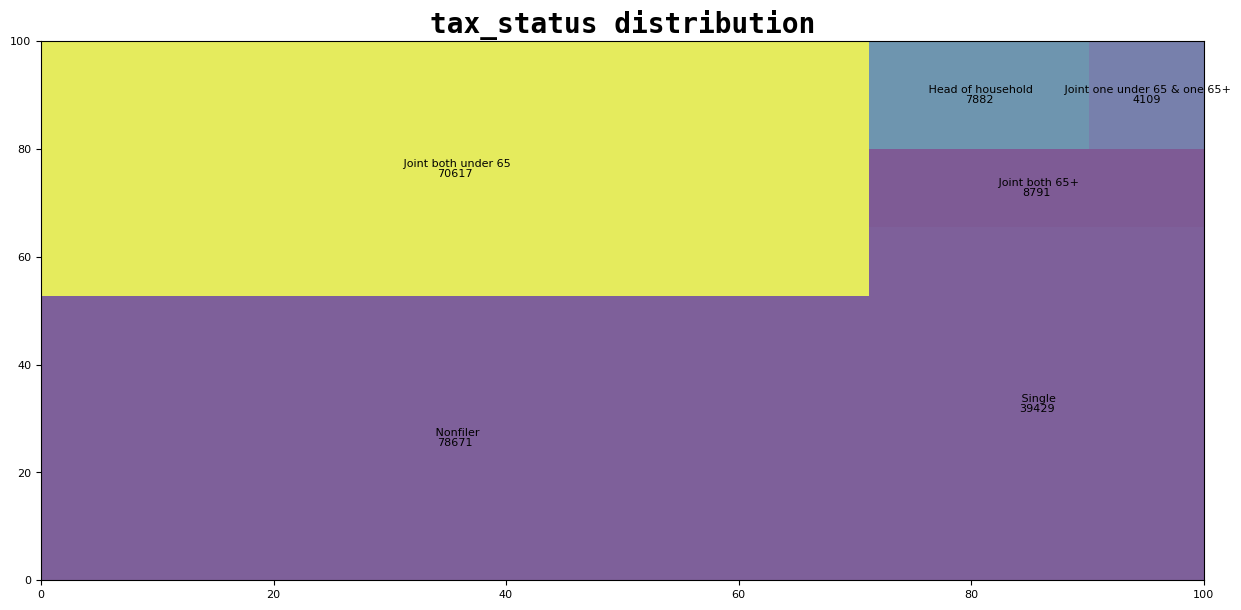

In [42]:
tax_status = income['tax_status'].value_counts()
plt.figure(figsize=(15, 7))
plt.rc('font', size=8)
squarify.plot(sizes=tax_status.values, label=tax_status.index, value=tax_status.values,alpha=0.7)
plt.title('tax_status distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.show()

In [43]:
income['tax_status'].value_counts()

tax_status
Nonfiler                        78671
Joint both under 65             70617
Single                          39429
Joint both 65+                   8791
Head of household                7882
Joint one under 65 & one 65+     4109
Name: count, dtype: int64

In [44]:
fig, axes = plt.subplots(2,2,figsize=(18, 12))

# Plot the distribution of gender
is_hispanic = income['is_hispanic'].value_counts()
sns.barplot(x=is_hispanic.values, y=is_hispanic.index, palette='rainbow', ax=axes[0,0])
axes[0,0].set_title('Distribution of is_hispanic', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axes[0,0].set_xlabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[0,0].set_ylabel('hispanic origin', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[0,0].tick_params(labelsize=10)

# Plot the distribution of employment_stat
employment_commitment = income['employment_commitment'].value_counts()
sns.barplot(x=employment_commitment.values, y=employment_commitment.index, palette='rainbow', ax=axes[0,1])
axes[0,1].set_title('Distribution of employment_commitment', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axes[0,1].set_xlabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[0,1].set_ylabel('employment_commitment', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[0,1].tick_params(labelsize=10)

# Plot the distribution of country_of_birth_own
industry_code_main = income['industry_code_main'].value_counts()
sns.barplot(x=industry_code_main.values, y=industry_code_main.index, palette='rainbow', ax=axes[1,0])
axes[1,0].set_title('Distribution of country_of_birth_own', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
axes[1,0].set_xlabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[1,0].set_ylabel('industry_code_main', fontdict={'fontname': 'Monospace', 'fontsize': 15})
axes[1,0].tick_params(labelsize=10)

axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

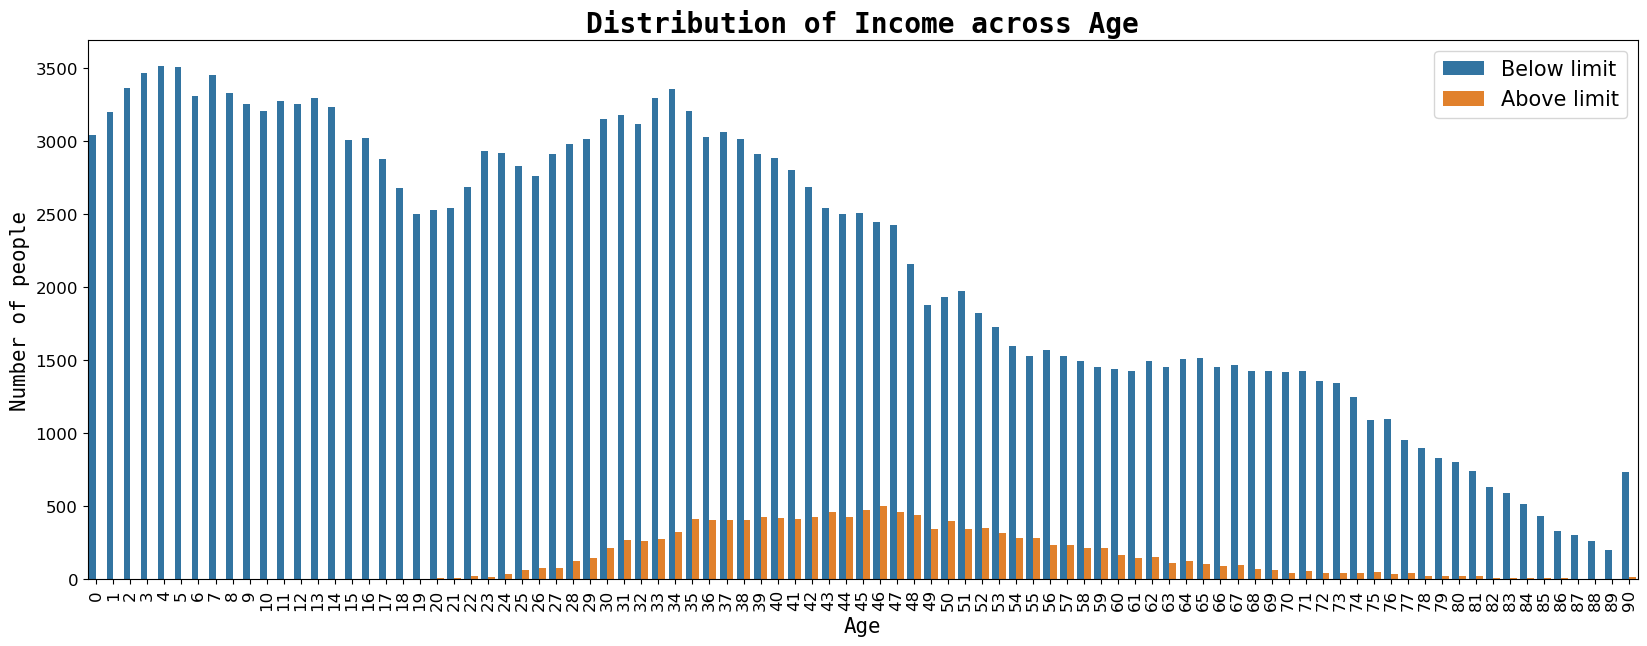

In [45]:
# Creating a countplot of income across age
plt.figure(figsize=(20, 7))
sns.countplot(x=income['age'], hue=income['income_above_limit'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.xticks(rotation=90)
plt.legend(loc=1, prop={'size': 15})
plt.show()

In [46]:
# Creating a countplot of income across education
plt.figure(figsize=(20, 7))
sns.countplot(x=income['education'],
              hue=income['income_above_limit'], palette='colorblind')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.xticks(rotation=90)
plt.legend(loc=1, prop={'size': 15})
plt.show()

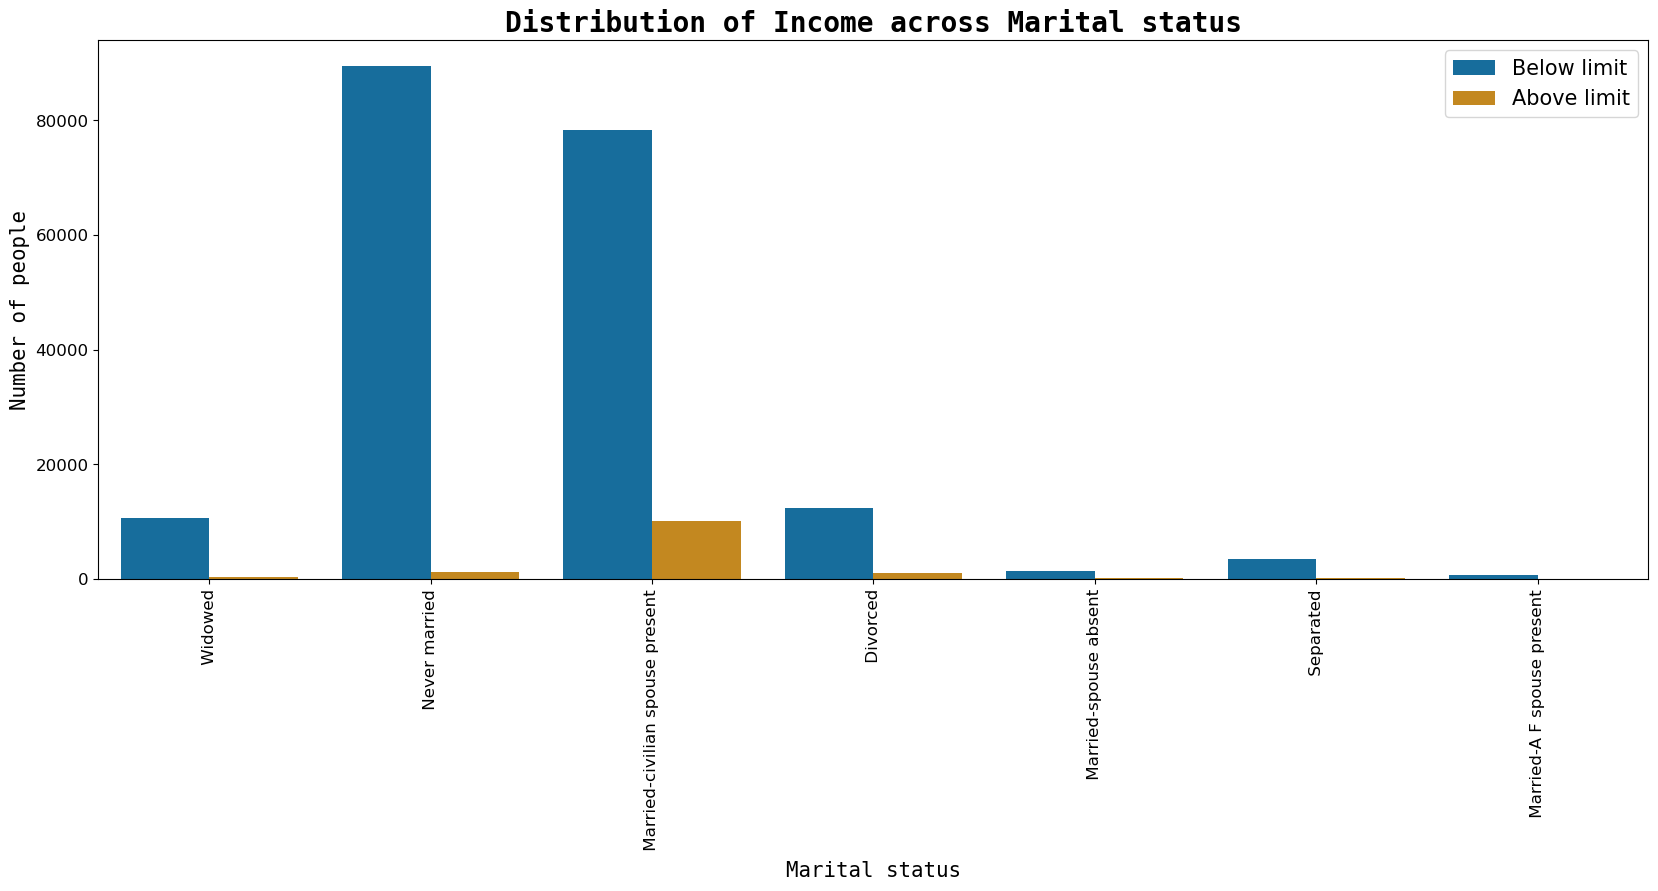

In [47]:
# Creating a countplot of income across education
plt.figure(figsize=(20, 7))
sns.countplot(x=income['marital_status'],
              hue=income['income_above_limit'], palette='colorblind')
plt.title('Distribution of Income across Marital status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital status', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.xticks(rotation=90)
plt.legend(loc=1, prop={'size': 15})
plt.show()

In [48]:
# Creating a countplot of income across education
plt.figure(figsize=(20, 7))
sns.countplot(x=income['race'],
              hue=income['income_above_limit'], palette='colorblind')
plt.title('Distribution of Income across race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.xticks(rotation=90)
plt.legend(loc=1, prop={'size': 15})
plt.show()

In [49]:
# Creating a countplot of income across education
plt.figure(figsize=(20, 7))
sns.countplot(x=income['gender'],
              hue=income['income_above_limit'], palette='colorblind')
plt.title('Distribution of Income across gender', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Gender', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.xticks(rotation=90)
plt.legend(loc=1, prop={'size': 15})
plt.show()

In [50]:
sns.pairplot(income)
plt.show()

c:\Users\shrir\anaconda3\envs\Visioguide\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\shrir\anaconda3\envs\Visioguide\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\shrir\anaconda3\envs\Visioguide\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\shrir\anaconda3\envs\Visioguide\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\shrir\anaconda3\envs\Visioguide\Lib\site-packages\seaborn\_oldcore.py:1

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

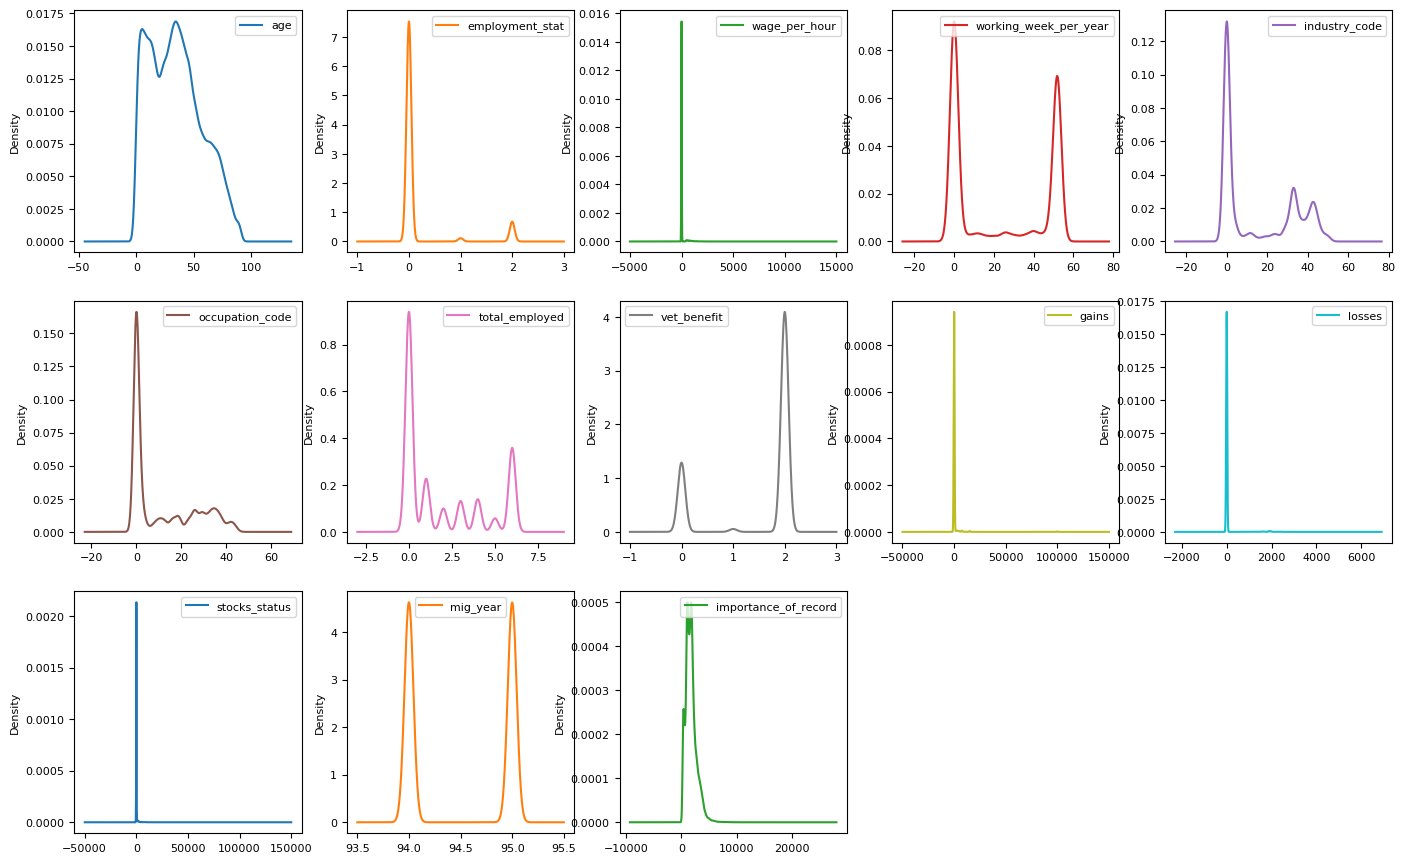

In [51]:
income.plot(kind="density", 
                subplots=True, 
                layout = (6,5), 
                figsize=(17,22), 
                sharex=False, 
                sharey=False)

In [50]:
numeric_income = income.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numeric_income.corr(method='pearson')

# Create the heatmap
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(corr, square=True, annot=True, annot_kws={"size": 10}) # Adjust the size as needed
plt.show()

# <span style="font-family:cursive;text-align:center">⚙️ Data Preprocessing</span>

In [51]:
round(income.isna().sum() / income.shape[0] * 100, 2).astype(str) + ' %'

ID                                  0.0 %
age                                 0.0 %
gender                              0.0 %
education                           0.0 %
class                             50.24 %
education_institute               93.65 %
marital_status                      0.0 %
race                                0.0 %
is_hispanic                         0.0 %
employment_commitment               0.0 %
unemployment_reason               96.89 %
employment_stat                     0.0 %
wage_per_hour                       0.0 %
is_labor_union                    90.42 %
working_week_per_year               0.0 %
industry_code                       0.0 %
industry_code_main                  0.0 %
occupation_code                     0.0 %
occupation_code_main              50.45 %
total_employed                      0.0 %
household_stat                      0.0 %
household_summary                   0.0 %
under_18_family                   72.39 %
veterans_admin_questionnaire      

In [52]:
# dropping columns with too much nan values i.e more than 50%
nan_cols_drop  = []
for cols in income.columns:
    if income[cols].isna().sum()/income.shape[0] >0.5:
        nan_cols_drop.append(cols)

In [53]:
nan_cols_drop

['class',
 'education_institute',
 'unemployment_reason',
 'is_labor_union',
 'occupation_code_main',
 'under_18_family',
 'veterans_admin_questionnaire',
 'residence_1_year_ago',
 'old_residence_reg',
 'old_residence_state']

In [54]:
income=income.drop(nan_cols_drop, axis=1)

In [55]:
income.shape

(209499, 33)

In [56]:
round(income.isna().sum() / income.shape[0] * 100, 2).astype(str) + ' %'

ID                                  0.0 %
age                                 0.0 %
gender                              0.0 %
education                           0.0 %
marital_status                      0.0 %
race                                0.0 %
is_hispanic                         0.0 %
employment_commitment               0.0 %
employment_stat                     0.0 %
wage_per_hour                       0.0 %
working_week_per_year               0.0 %
industry_code                       0.0 %
industry_code_main                  0.0 %
occupation_code                     0.0 %
total_employed                      0.0 %
household_stat                      0.0 %
household_summary                   0.0 %
vet_benefit                         0.0 %
tax_status                          0.0 %
gains                               0.0 %
losses                              0.0 %
stocks_status                       0.0 %
citizenship                         0.0 %
mig_year                          

In [57]:
income.drop('migration_prev_sunbelt', axis=1, inplace=True)

In [58]:
round(income.isna().sum() / income.shape[0] * 100, 2).astype(str) + ' %'

ID                                 0.0 %
age                                0.0 %
gender                             0.0 %
education                          0.0 %
marital_status                     0.0 %
race                               0.0 %
is_hispanic                        0.0 %
employment_commitment              0.0 %
employment_stat                    0.0 %
wage_per_hour                      0.0 %
working_week_per_year              0.0 %
industry_code                      0.0 %
industry_code_main                 0.0 %
occupation_code                    0.0 %
total_employed                     0.0 %
household_stat                     0.0 %
household_summary                  0.0 %
vet_benefit                        0.0 %
tax_status                         0.0 %
gains                              0.0 %
losses                             0.0 %
stocks_status                      0.0 %
citizenship                        0.0 %
mig_year                           0.0 %
country_of_birth

In [59]:
income.shape

(209499, 32)

In [60]:
income = income.drop(['country_of_birth_own','country_of_birth_father','country_of_birth_mother'],axis=1) #dropping these columns as they are not useful

In [61]:
income.shape

(209499, 29)

In [62]:
round(income.isna().sum() / income.shape[0] * 100, 2).astype(str) + ' %'

ID                                 0.0 %
age                                0.0 %
gender                             0.0 %
education                          0.0 %
marital_status                     0.0 %
race                               0.0 %
is_hispanic                        0.0 %
employment_commitment              0.0 %
employment_stat                    0.0 %
wage_per_hour                      0.0 %
working_week_per_year              0.0 %
industry_code                      0.0 %
industry_code_main                 0.0 %
occupation_code                    0.0 %
total_employed                     0.0 %
household_stat                     0.0 %
household_summary                  0.0 %
vet_benefit                        0.0 %
tax_status                         0.0 %
gains                              0.0 %
losses                             0.0 %
stocks_status                      0.0 %
citizenship                        0.0 %
mig_year                           0.0 %
migration_code_c

In [63]:
# Replace '?' with NaN for the specified columns
columns_to_clean = ['migration_code_change_in_msa', 'migration_code_move_within_reg', 'migration_code_change_in_reg']
income[columns_to_clean] = income[columns_to_clean].replace('?', pd.NA)

# Now calculate the missing value percentage
missing_percentages = income[columns_to_clean].isnull().mean() * 100

In [64]:
income.head()

ID  age   gender               education  \
0  ID_TZ0000   79   Female    High school graduate   
1  ID_TZ0001   65   Female    High school graduate   
2  ID_TZ0002   21     Male   12th grade no diploma   
3  ID_TZ0003    2   Female                Children   
4  ID_TZ0004   70     Male    High school graduate   

                     marital_status                        race is_hispanic  \
0                           Widowed                       White   All other   
1                           Widowed                       White   All other   
2                     Never married                       Black   All other   
3                     Never married   Asian or Pacific Islander   All other   
4   Married-civilian spouse present                       White   All other   

       employment_commitment  employment_stat  wage_per_hour  ...  gains  \
0         Not in labor force                0              0  ...      0   
1   Children or Armed Forces                0              0  ...      0   
2   Children or Armed Forces                0            500  ...      0   
3   Children or Armed Forces                0              0  ...      0   
4         Not in labor force                0              0  ...      0   

   losses stocks_status  citizenship  mig_year migration_code_change_in_msa  \
0       0           292       Native        95                            ?   
1       0             0       Native        94                    unchanged   
2       0             0       Native        94                    unchanged   
3       0             0       Native        94                    unchanged   
4       0             0       Native        95                            ?   

  migration_code_move_within_reg  migration_code_change_in_reg  \
0                              ?                             ?   
1                      unchanged                     unchanged   
2                      unchanged                     unchanged   
3                      unchanged                     unchanged   
4                              ?                             ?   

  importance_of_record  income_above_limit  
0              1779.74         Below limit  
1              2366.75         Below limit  
2              1693.42         Below limit  
3              1380.27         Below limit  
4              1580.79         Below limit  

[5 rows x 29 columns]

In [65]:
col=['migration_code_change_in_msa', 'migration_code_move_within_reg', 'migration_code_change_in_reg']

income.drop( col, axis=1, inplace=True)

In [66]:
income.head()

ID  age   gender               education  \
0  ID_TZ0000   79   Female    High school graduate   
1  ID_TZ0001   65   Female    High school graduate   
2  ID_TZ0002   21     Male   12th grade no diploma   
3  ID_TZ0003    2   Female                Children   
4  ID_TZ0004   70     Male    High school graduate   

                     marital_status                        race is_hispanic  \
0                           Widowed                       White   All other   
1                           Widowed                       White   All other   
2                     Never married                       Black   All other   
3                     Never married   Asian or Pacific Islander   All other   
4   Married-civilian spouse present                       White   All other   

       employment_commitment  employment_stat  wage_per_hour  ...  \
0         Not in labor force                0              0  ...   
1   Children or Armed Forces                0              0  ...   
2   Children or Armed Forces                0            500  ...   
3   Children or Armed Forces                0              0  ...   
4         Not in labor force                0              0  ...   

               household_summary  vet_benefit          tax_status  gains  \
0                    Householder            2   Head of household      0   
1                    Householder            2              Single      0   
2              Child 18 or older            2              Single      0   
3   Child under 18 never married            0            Nonfiler      0   
4          Spouse of householder            2      Joint both 65+      0   

   losses stocks_status citizenship  mig_year importance_of_record  \
0       0           292      Native        95              1779.74   
1       0             0      Native        94              2366.75   
2       0             0      Native        94              1693.42   
3       0             0      Native        94              1380.27   
4       0             0      Native        95              1580.79   

   income_above_limit  
0         Below limit  
1         Below limit  
2         Below limit  
3         Below limit  
4         Below limit  

[5 rows x 26 columns]

In [67]:
income.isna().sum()

ID                       0
age                      0
gender                   0
education                0
marital_status           0
race                     0
is_hispanic              0
employment_commitment    0
employment_stat          0
wage_per_hour            0
working_week_per_year    0
industry_code            0
industry_code_main       0
occupation_code          0
total_employed           0
household_stat           0
household_summary        0
vet_benefit              0
tax_status               0
gains                    0
losses                   0
stocks_status            0
citizenship              0
mig_year                 0
importance_of_record     0
income_above_limit       0
dtype: int64

In [68]:
#now we dont have any missing values

age                          Axes(0.125,0.77;0.133621x0.11)
employment_stat           Axes(0.285345,0.77;0.133621x0.11)
wage_per_hour              Axes(0.44569,0.77;0.133621x0.11)
working_week_per_year     Axes(0.606034,0.77;0.133621x0.11)
industry_code             Axes(0.766379,0.77;0.133621x0.11)
occupation_code             Axes(0.125,0.638;0.133621x0.11)
total_employed           Axes(0.285345,0.638;0.133621x0.11)
vet_benefit               Axes(0.44569,0.638;0.133621x0.11)
gains                    Axes(0.606034,0.638;0.133621x0.11)
losses                   Axes(0.766379,0.638;0.133621x0.11)
stocks_status               Axes(0.125,0.506;0.133621x0.11)
mig_year                 Axes(0.285345,0.506;0.133621x0.11)
importance_of_record      Axes(0.44569,0.506;0.133621x0.11)
dtype: object

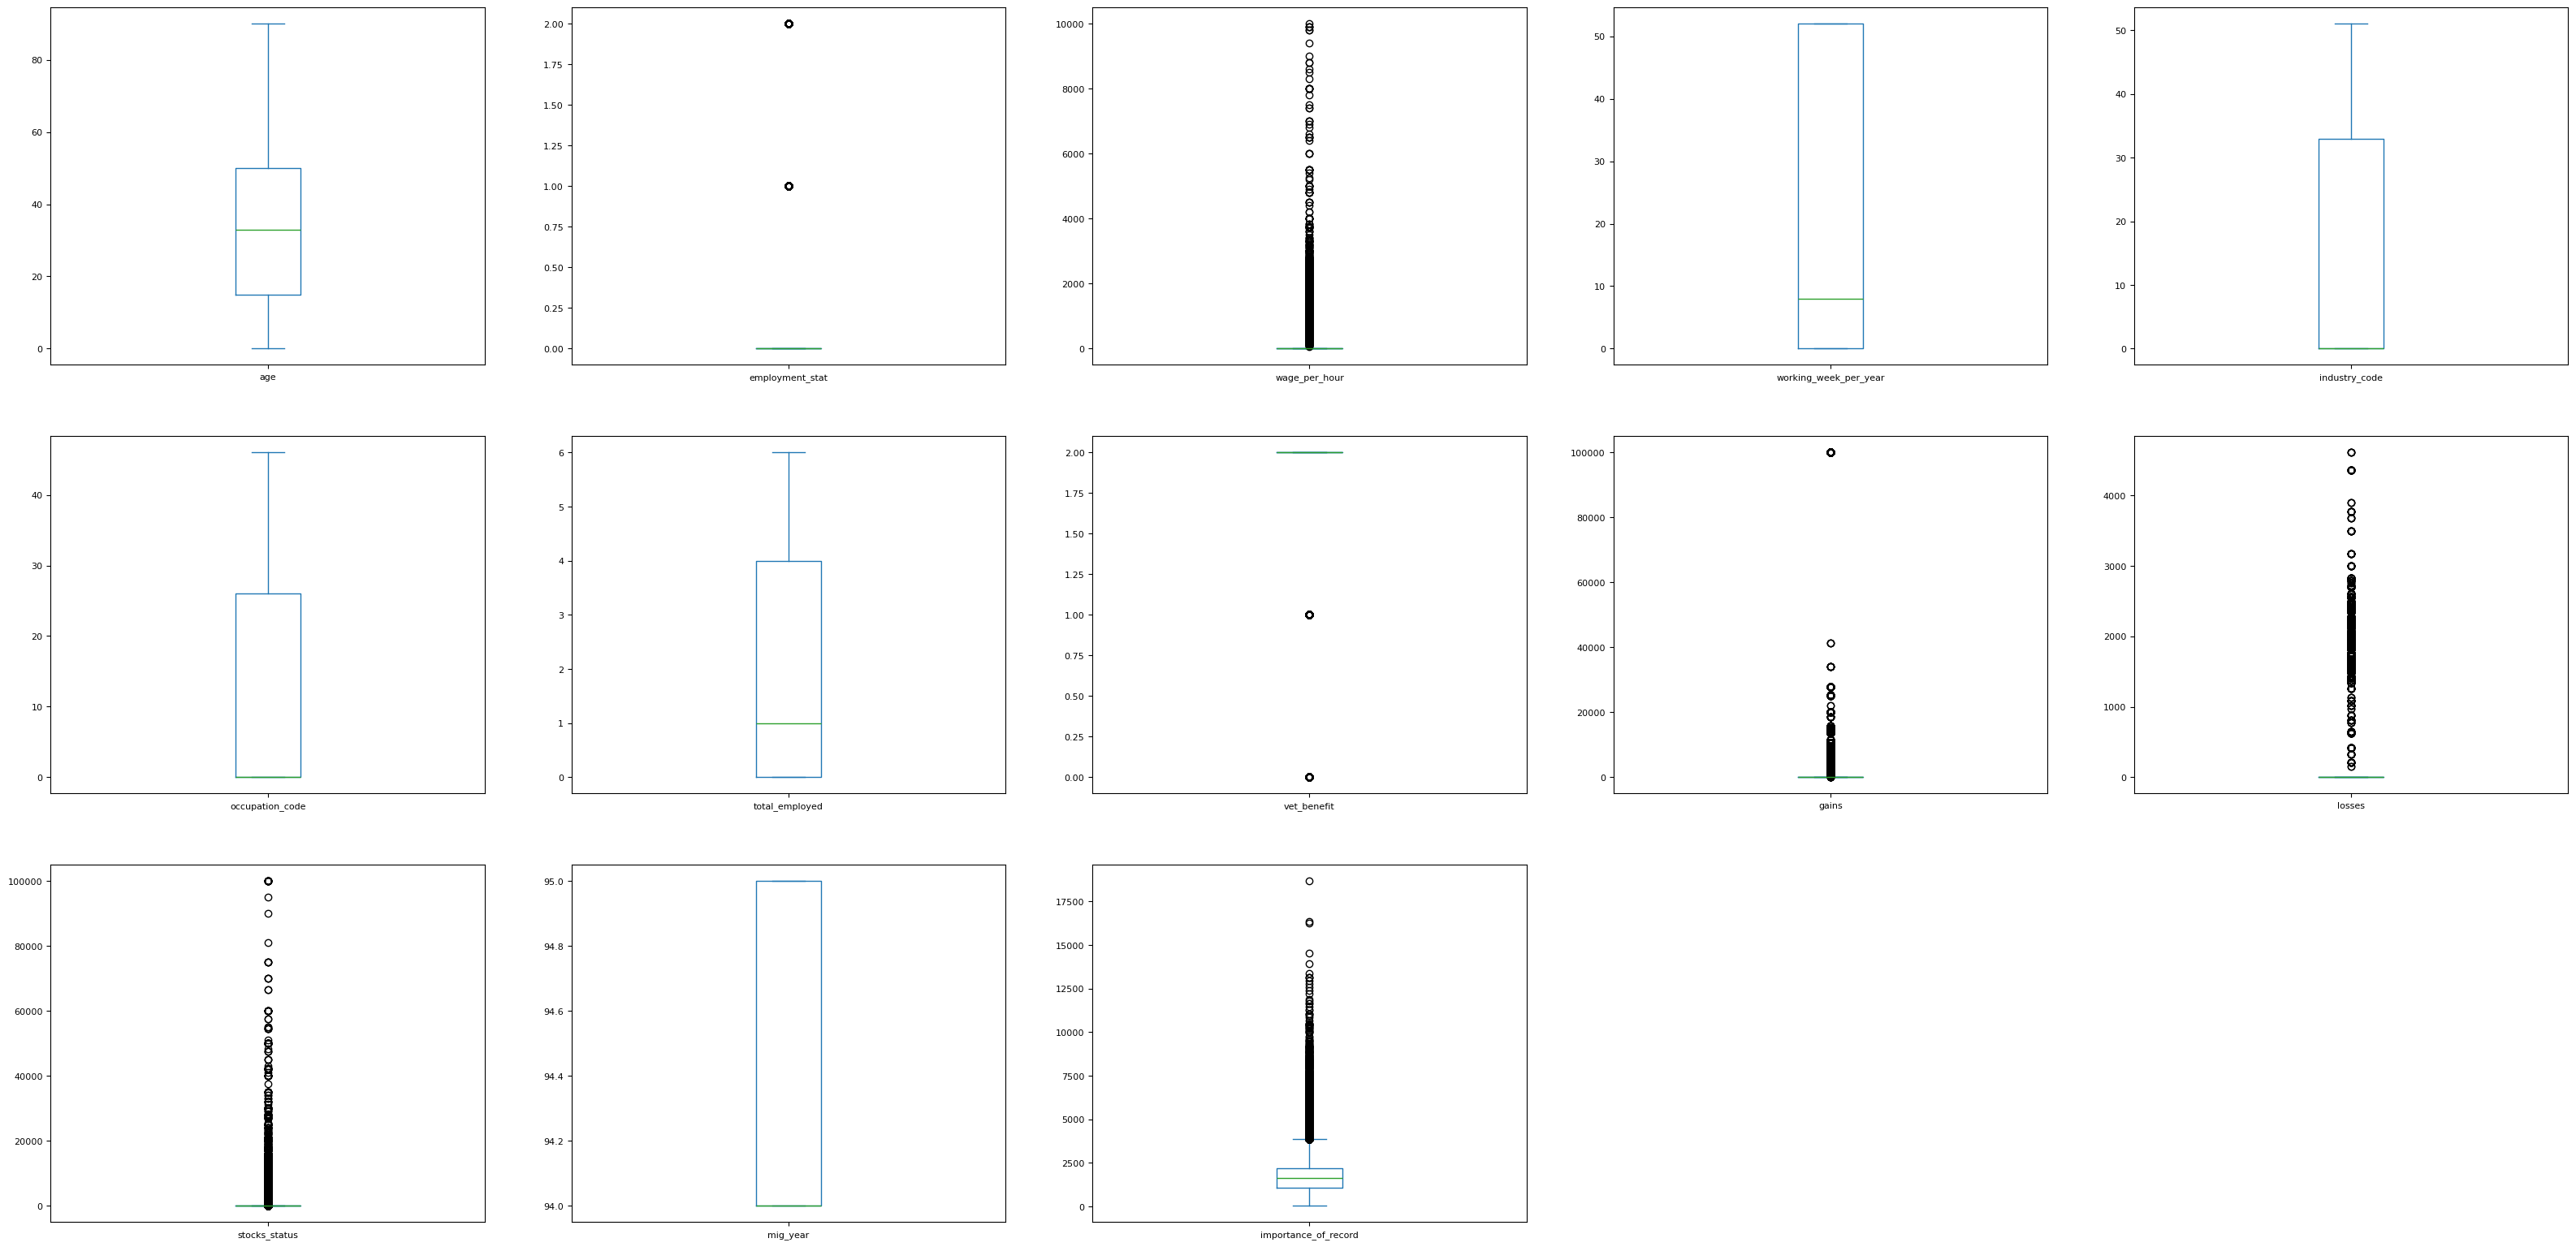

In [69]:
income.plot(kind="box", 
            vert=True,
            subplots=True,
            layout=(6, 5),
            figsize=(40, 40),
            sharex=False,
            sharey=False)

In [70]:
# checking for outliers in the dataset before training and selecting only columns with visible outliers in boxplot
for i in ['wage_per_hour','gains','losses','stocks_status','importance_of_record']:
    #inter-quartile range calculation
    IQR=income[i].quantile(0.75)-income[i].quantile(0.25)
    lower_limit=income[i].quantile(0.25)-(IQR*1.5)
    upper_limit=income[i].quantile(0.75)+(IQR*1.5)

    outs=[]

    for j in income[i]:
        if j<lower_limit:
            outs.append(j)

    for k in income[i]:
        if k>upper_limit:
            outs.append(k)


    print(f'The percentage of outliers in {i}:', (len(outs)/len(income)*100),'%')

The percentage of outliers in wage_per_hour: 5.659215557114831 %
The percentage of outliers in gains: 3.7374880071026593 %
The percentage of outliers in losses: 1.9389114029183911 %
The percentage of outliers in stocks_status: 10.516517978606103 %
The percentage of outliers in importance_of_record: 3.22626838314264 %


In [71]:
income.head()

ID  age   gender               education  \
0  ID_TZ0000   79   Female    High school graduate   
1  ID_TZ0001   65   Female    High school graduate   
2  ID_TZ0002   21     Male   12th grade no diploma   
3  ID_TZ0003    2   Female                Children   
4  ID_TZ0004   70     Male    High school graduate   

                     marital_status                        race is_hispanic  \
0                           Widowed                       White   All other   
1                           Widowed                       White   All other   
2                     Never married                       Black   All other   
3                     Never married   Asian or Pacific Islander   All other   
4   Married-civilian spouse present                       White   All other   

       employment_commitment  employment_stat  wage_per_hour  ...  \
0         Not in labor force                0              0  ...   
1   Children or Armed Forces                0              0  ...   
2   Children or Armed Forces                0            500  ...   
3   Children or Armed Forces                0              0  ...   
4         Not in labor force                0              0  ...   

               household_summary  vet_benefit          tax_status  gains  \
0                    Householder            2   Head of household      0   
1                    Householder            2              Single      0   
2              Child 18 or older            2              Single      0   
3   Child under 18 never married            0            Nonfiler      0   
4          Spouse of householder            2      Joint both 65+      0   

   losses stocks_status citizenship  mig_year importance_of_record  \
0       0           292      Native        95              1779.74   
1       0             0      Native        94              2366.75   
2       0             0      Native        94              1693.42   
3       0             0      Native        94              1380.27   
4       0             0      Native        95              1580.79   

   income_above_limit  
0         Below limit  
1         Below limit  
2         Below limit  
3         Below limit  
4         Below limit  

[5 rows x 26 columns]

In [72]:
numerical_feature = [feature for feature in income.columns if income[feature].dtypes != 'O']
categorical_feature = [feature for feature in income.columns if feature not in numerical_feature]

for i in categorical_feature[1:]:
    print(i,income[i].unique(),'\n')

gender [' Female' ' Male'] 

education [' High school graduate' ' 12th grade no diploma' ' Children'
 ' Bachelors degree(BA AB BS)' ' 7th and 8th grade' ' 11th grade'
 ' 9th grade' ' Masters degree(MA MS MEng MEd MSW MBA)' ' 10th grade'
 ' Associates degree-academic program' ' 1st 2nd 3rd or 4th grade'
 ' Some college but no degree' ' Less than 1st grade'
 ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 5th or 6th grade'
 ' Doctorate degree(PhD EdD)'] 

marital_status [' Widowed' ' Never married' ' Married-civilian spouse present'
 ' Divorced' ' Married-spouse absent' ' Separated'
 ' Married-A F spouse present'] 

race [' White' ' Black' ' Asian or Pacific Islander'
 ' Amer Indian Aleut or Eskimo' ' Other'] 

is_hispanic [' All other' ' Mexican-American' ' Central or South American'
 ' Mexican (Mexicano)' ' Puerto Rican' ' Other Spanish' ' NA' ' Cuban'
 ' Do not know' ' Chicano'] 

employment_commitment [' Not in labor force' ' Children or Armed Forc

In [73]:
income.sample(10)

ID  age   gender                                education  \
40198   ID_TZ135312   40     Male               Bachelors degree(BA AB BS)   
205656   ID_TZ96506   61   Female                    12th grade no diploma   
189640   ID_TZ81946   26   Female                     High school graduate   
197051   ID_TZ88683   42   Female               Some college but no degree   
167205   ID_TZ61550   31     Male               Bachelors degree(BA AB BS)   
29460   ID_TZ125639   35     Male                     High school graduate   
164764   ID_TZ59331   36     Male                     High school graduate   
112664  ID_TZ200598    7   Female                                 Children   
88931   ID_TZ179216   36   Female   Masters degree(MA MS MEng MEd MSW MBA)   
193205   ID_TZ85187   53     Male                     High school graduate   

                          marital_status                        race  \
40198    Married-civilian spouse present   Asian or Pacific Islander   
205656   Married-civilian spouse present                       White   
189640   Married-civilian spouse present                       White   
197051   Married-civilian spouse present                       White   
167205                     Never married                       White   
29460    Married-civilian spouse present                       White   
164764   Married-civilian spouse present   Asian or Pacific Islander   
112664                     Never married                       White   
88931    Married-civilian spouse present                       White   
193205   Married-civilian spouse present                       Black   

       is_hispanic      employment_commitment  employment_stat  wage_per_hour  \
40198    All other   Children or Armed Forces                0              0   
205656   All other   Children or Armed Forces                0              0   
189640   All other   Children or Armed Forces                0              0   
197051   All other        Full-time schedules                0              0   
167205   All other   Children or Armed Forces                0              0   
29460    All other        Full-time schedules                0              0   
164764   All other        Full-time schedules                0              0   
112664   All other   Children or Armed Forces                0              0   
88931    All other   Children or Armed Forces                0              0   
193205   All other   Children or Armed Forces                0            700   

        ...               household_summary  vet_benefit  \
40198   ...   Other relative of householder            2   
205656  ...           Spouse of householder            2   
189640  ...           Spouse of householder            2   
197051  ...                     Householder            2   
167205  ...                     Householder            2   
29460   ...                     Householder            2   
164764  ...                     Householder            2   
112664  ...    Child under 18 never married            0   
88931   ...                     Householder            2   
193205  ...                     Householder            2   

                  tax_status  gains  losses stocks_status  \
40198    Joint both under 65      0       0             0   
205656   Joint both under 65      0       0             0   
189640              Nonfiler      0       0             0   
197051   Joint both under 65      0       0             0   
167205                Single      0       0             0   
29460    Joint both under 65      0    2179             0   
164764   Joint both under 65      0       0             0   
112664              Nonfiler      0       0             0   
88931    Joint both under 65      0       0             0   
193205   Joint both under 65      0       0             0   

                                         citizenship  mig_year  \
40198    Foreign born- U S citizen by naturalization        94   
205656  

In [74]:
income.drop(columns=['household_stat'], axis=1, inplace=True)

In [75]:
numerical_feature = [feature for feature in income.columns if income[feature].dtypes != 'O']
categorical_feature = [feature for feature in income.columns if feature not in numerical_feature]

In [76]:
print('The class Imbalance in the data is given below')
print(income['income_above_limit'].value_counts(),'\n')
print('The class imbalance in terms of percentage is given below ')
print(f"{income['income_above_limit'].value_counts(normalize=True)*100}")

The class Imbalance in the data is given below
income_above_limit
Below limit    196501
Above limit     12998
Name: count, dtype: int64 

The class imbalance in terms of percentage is given below 
income_above_limit
Below limit    93.795674
Above limit     6.204326
Name: proportion, dtype: float64


In [77]:
def ordinal_encoding(df, feats): 
    for feat in feats:    
        feat_val = list(np.arange(df[feat].nunique()))
        feat_key = list(df[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        df[feat] = df[feat].map(feat_dict)
    return df

df = ordinal_encoding(income, income.drop(['income_above_limit'], axis=1).columns)
df.shape                                     

(209499, 25)

In [78]:
income.head()

ID  age  gender  education  marital_status  race  is_hispanic  \
0   0   79       0         12               6     4            0   
1   1   65       0         12               6     4            0   
2   2   21       1          2               4     2            0   
3   3    2       0         10               4     1            0   
4   4   70       1         12               2     4            0   

   employment_commitment  employment_stat  wage_per_hour  ...  \
0                      2                0              0  ...   
1                      0                0              0  ...   
2                      0                0            102  ...   
3                      0                0              0  ...   
4                      2                0              0  ...   

   household_summary  vet_benefit  tax_status  gains  losses  stocks_status  \
0                  4            2           0      0       0            273   
1                  4            2           5      0       0              0   
2                  0            2           5      0       0              0   
3                  2            0           4      0       0              0   
4                  7            2           1      0       0              0   

   citizenship  mig_year  importance_of_record  income_above_limit  
0            4         1                 55690         Below limit  
1            4         0                 76194         Below limit  
2            4         0                 51881         Below limit  
3            4         0                 39247         Below limit  
4            4         1                 47108         Below limit  

[5 rows x 25 columns]

In [79]:
income.drop(columns=['ID'], axis=1, inplace=True)

In [80]:
income.head()

age  gender  education  marital_status  race  is_hispanic  \
0   79       0         12               6     4            0   
1   65       0         12               6     4            0   
2   21       1          2               4     2            0   
3    2       0         10               4     1            0   
4   70       1         12               2     4            0   

   employment_commitment  employment_stat  wage_per_hour  \
0                      2                0              0   
1                      0                0              0   
2                      0                0            102   
3                      0                0              0   
4                      2                0              0   

   working_week_per_year  ...  household_summary  vet_benefit  tax_status  \
0                     52  ...                  4            2           0   
1                      0  ...                  4            2           5   
2                     15  ...                  0            2           5   
3                      0  ...                  2            0           4   
4                      0  ...                  7            2           1   

   gains  losses  stocks_status  citizenship  mig_year  importance_of_record  \
0      0       0            273            4         1                 55690   
1      0       0              0            4         0                 76194   
2      0       0              0            4         0                 51881   
3      0       0              0            4         0                 39247   
4      0       0              0            4         1                 47108   

   income_above_limit  
0         Below limit  
1         Below limit  
2         Below limit  
3         Below limit  
4         Below limit  

[5 rows x 24 columns]

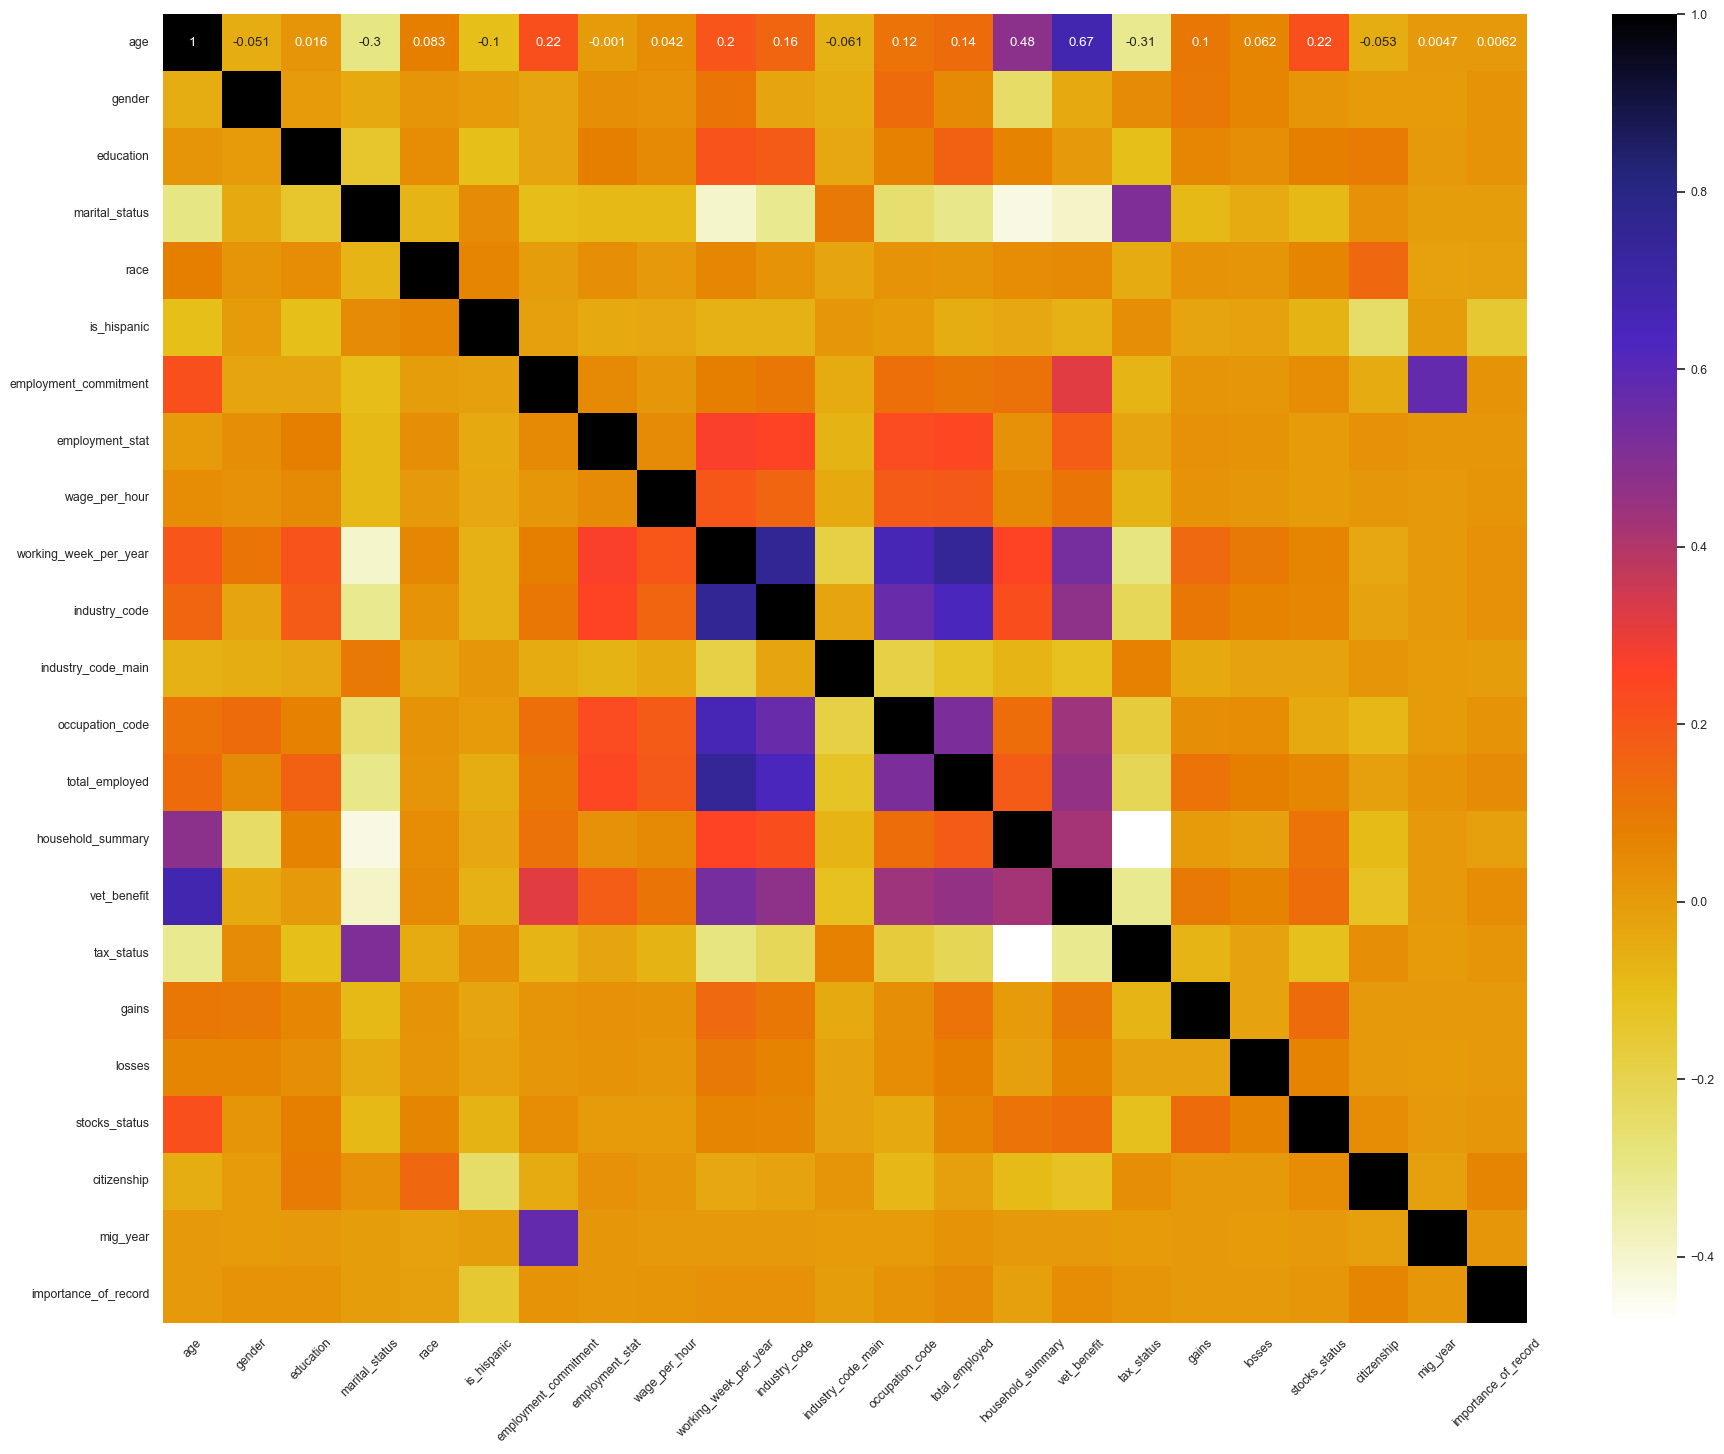

In [81]:
# Assuming 'Injury_Type' is the column with strings like 'Slight Injury'
df_numeric = df.drop(columns=['income_above_limit'])

plt.figure(figsize=(22, 17))
sns.set(font_scale=0.8)
heatmap = sns.heatmap(df_numeric.corr(), annot=True, cmap=plt.cm.CMRmap_r)

# Rotate x-axis tick labels
plt.xticks(rotation=45)

# Rotate y-axis tick labels
plt.yticks(rotation=0)

plt.show()



In [83]:
#treating the unbalanced dataset
x,y = df.drop(['income_above_limit'],axis=1),income['income_above_limit']

In [84]:
ros=RandomOverSampler(random_state=42)
X_random_resampled, Y_random_resampled = ros.fit_resample(x,y)

In [85]:
print('The class Imbalance in the data is given below')
print(Y_random_resampled.value_counts(),'\n')
print('The class imbalance in terms of percentage is given below ')
print(f"{Y_random_resampled.value_counts(normalize=True)*100}")

The class Imbalance in the data is given below
income_above_limit
Below limit    196501
Above limit    196501
Name: count, dtype: int64 

The class imbalance in terms of percentage is given below 
income_above_limit
Below limit    50.0
Above limit    50.0
Name: proportion, dtype: float64


In [86]:
X_random_resampled.head()

age  gender  education  marital_status  race  is_hispanic  \
0   79       0         12               6     4            0   
1   65       0         12               6     4            0   
2   21       1          2               4     2            0   
3    2       0         10               4     1            0   
4   70       1         12               2     4            0   

   employment_commitment  employment_stat  wage_per_hour  \
0                      2                0              0   
1                      0                0              0   
2                      0                0            102   
3                      0                0              0   
4                      2                0              0   

   working_week_per_year  ...  total_employed  household_summary  vet_benefit  \
0                     52  ...               2                  4            2   
1                      0  ...               0                  4            2   
2                     15  ...               4                  0            2   
3                      0  ...               0                  2            0   
4                      0  ...               0                  7            2   

   tax_status  gains  losses  stocks_status  citizenship  mig_year  \
0           0      0       0            273            4         1   
1           5      0       0              0            4         0   
2           5      0       0              0            4         0   
3           4      0       0              0            4         0   
4           1      0       0              0            4         1   

   importance_of_record  
0                 55690  
1                 76194  
2                 51881  
3                 39247  
4                 47108  

[5 rows x 23 columns]

In [87]:
#Now the data seems to be balanced

In [88]:
#creating test-train split
X_train, X_test, Y_train, Y_test = train_test_split(X_random_resampled, Y_random_resampled, test_size=0.2, random_state=42)

In [89]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (314401, 23)
X_test shape: (78601, 23)
Y_train shape: (314401,)
Y_test shape: (78601,)


In [90]:
X_train.reset_index(drop=True,inplace=True)
X_train.head()

age  gender  education  marital_status  race  is_hispanic  \
0   32       1         12               0     4            0   
1   74       0         12               2     4            0   
2   43       1          7               4     4            0   
3   43       1         16               4     4            0   
4   22       0         16               4     4            8   

   employment_commitment  employment_stat  wage_per_hour  \
0                      0                0              0   
1                      0                0              0   
2                      7                0              0   
3                      1                0              0   
4                      2                0              0   

   working_week_per_year  ...  total_employed  household_summary  vet_benefit  \
0                     52  ...               1                  4            2   
1                      0  ...               0                  7            2   
2                     52  ...               6                  4            2   
3                     52  ...               6                  4            2   
4                      0  ...               0                  0            2   

   tax_status  gains  losses  stocks_status  citizenship  mig_year  \
0           0      0       0              0            4         0   
1           4      0       0              0            4         0   
2           5      0       0              0            4         1   
3           5      0       0            125            4         1   
4           4      0       0              0            4         1   

   importance_of_record  
0                 32469  
1                 72977  
2                 93229  
3                 36823  
4                 13427  

[5 rows x 23 columns]

In [91]:
X_test.reset_index(drop=True,inplace=True)
X_test.head()

age  gender  education  marital_status  race  is_hispanic  \
0   28       1         12               2     4            9   
1   21       1         12               4     4            0   
2   43       0         16               2     4            0   
3   40       0          1               6     4            1   
4    6       1         10               4     4            0   

   employment_commitment  employment_stat  wage_per_hour  \
0                      0                0              0   
1                      1                0            332   
2                      1                0              0   
3                      0                0            201   
4                      0                0              0   

   working_week_per_year  ...  total_employed  household_summary  vet_benefit  \
0                     52  ...               2                  4            2   
1                     45  ...               6                  4            2   
2                     52  ...               6                  7            2   
3                     52  ...               3                  4            2   
4                      0  ...               0                  2            0   

   tax_status  gains  losses  stocks_status  citizenship  mig_year  \
0           2      0       0              0            4         0   
1           5    128       0              0            4         1   
2           2      0       0              0            4         1   
3           0      0       0              0            4         0   
4           4      0       0              0            4         1   

   importance_of_record  
0                 19550  
1                 36183  
2                 97830  
3                 26980  
4                 94875  

[5 rows x 23 columns]

In [92]:
Y_train.head()

65558     Below limit
44479     Below limit
378132    Above limit
262249    Above limit
52671     Below limit
Name: income_above_limit, dtype: object

In [93]:
Y_test.head()

170413    Below limit
324371    Above limit
225663    Above limit
195870    Below limit
204823    Below limit
Name: income_above_limit, dtype: object

In [ ]:
# #Encoding process starts

# col_encoding=['gender',
#  'education',
#  'marital_status',
#  'race',
#  'is_hispanic',
#  'employment_commitment',
#  'industry_code_main',
#  'household_summary',
#  'tax_status',
#  'citizenship']

# col_keep=X_train.drop(col_encoding,axis=1).columns

# encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')

# encoded_columns=encoder.fit_transform(X_train[col_encoding])

# encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(col_encoding))


# X_train_encoded = pd.concat([encoded_df, X_train[col_keep]], axis=1)


In [94]:
X_train.head()


age  gender  education  marital_status  race  is_hispanic  \
0   32       1         12               0     4            0   
1   74       0         12               2     4            0   
2   43       1          7               4     4            0   
3   43       1         16               4     4            0   
4   22       0         16               4     4            8   

   employment_commitment  employment_stat  wage_per_hour  \
0                      0                0              0   
1                      0                0              0   
2                      7                0              0   
3                      1                0              0   
4                      2                0              0   

   working_week_per_year  ...  total_employed  household_summary  vet_benefit  \
0                     52  ...               1                  4            2   
1                      0  ...               0                  7            2   
2                     52  ...               6                  4            2   
3                     52  ...               6                  4            2   
4                      0  ...               0                  0            2   

   tax_status  gains  losses  stocks_status  citizenship  mig_year  \
0           0      0       0              0            4         0   
1           4      0       0              0            4         0   
2           5      0       0              0            4         1   
3           5      0       0            125            4         1   
4           4      0       0              0            4         1   

   importance_of_record  
0                 32469  
1                 72977  
2                 93229  
3                 36823  
4                 13427  

[5 rows x 23 columns]

In [ ]:
# encoded_columns = encoder.transform(X_test[col_encoding])

# encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(col_encoding))

# X_test_encoded = pd.concat([encoded_df, X_test[col_keep]], axis=1)

# X_test_encoded.head()

gender_ Female  gender_ Male  education_ 10th grade  education_ 11th grade  \
0             0.0           1.0                    0.0                    0.0   
1             0.0           1.0                    0.0                    0.0   
2             1.0           0.0                    0.0                    0.0   
3             1.0           0.0                    0.0                    1.0   
4             0.0           1.0                    0.0                    0.0   

   education_ 12th grade no diploma  education_ 1st 2nd 3rd or 4th grade  \
0                               0.0                                  0.0   
1                               0.0                                  0.0   
2                               0.0                                  0.0   
3                               0.0                                  0.0   
4                               0.0                                  0.0   

   education_ 5th or 6th grade  education_ 7th and 8th grade  \
0                          0.0                           0.0   
1                          0.0                           0.0   
2                          0.0                           0.0   
3                          0.0                           0.0   
4                          0.0                           0.0   

   education_ 9th grade  education_ Associates degree-academic program  ...  \
0                   0.0                                            0.0  ...   
1                   0.0                                            0.0  ...   
2                   0.0                                            0.0  ...   
3                   0.0                                            0.0  ...   
4                   0.0                                            0.0  ...   

   working_week_per_year  industry_code  occupation_code  total_employed  \
0                     52              4               34               2   
1                     45              4               39               6   
2                     52             29               38               6   
3                     52             33               26               3   
4                      0              0                0               0   

   vet_benefit  gains  losses  stocks_status  mig_year  importance_of_record  
0            2      0       0              0        94                905.79  
1            2  27828       0              0        95               1299.69  
2            2      0       0              0        95               3852.26  
3            2      0       0              0        94               1081.40  
4            0      0       0              0        95               3522.25  

[5 rows x 105 columns]

In [95]:
Y_train_copy = Y_train.copy()

In [96]:
Y_test_copy = Y_test.copy()

In [97]:
Y_test_copy

170413    Below limit
324371    Above limit
225663    Above limit
195870    Below limit
204823    Below limit
             ...     
284744    Above limit
142554    Below limit
266216    Above limit
368153    Above limit
234992    Above limit
Name: income_above_limit, Length: 78601, dtype: object

In [98]:
Y_train_copy.replace({'Below limit':0,'Above limit':1},inplace=True)
Y_test_copy.replace({'Below limit':0,'Above limit':1},inplace=True)

C:\Users\shrir\AppData\Local\Temp\ipykernel_11324\3878562278.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\shrir\AppData\Local\Temp\ipykernel_11324\3878562278.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
#Y_train.replace({'Below limit':0,'Above limit':1},inplace=True)
#Y_test.replace({'Below limit':0,'Above limit':1},inplace=True)

In [99]:
Y_train.head()

65558     Below limit
44479     Below limit
378132    Above limit
262249    Above limit
52671     Below limit
Name: income_above_limit, dtype: object

Random Forest Classifier

In [100]:
ran_for=RandomForestClassifier(random_state=42)
ran_for.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [166]:
X_train['education'].unique()

array([12,  7, 16, 14,  0, 10,  9,  8,  2,  6,  1,  4,  5, 11, 15,  3, 13])

In [101]:
ran_for.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [102]:
ran_for.feature_importances_

array([0.11625006, 0.04593298, 0.05026913, 0.02380151, 0.00834009,
       0.00781255, 0.01258124, 0.00916167, 0.01074571, 0.09596563,
       0.08420441, 0.02993832, 0.15184346, 0.08001313, 0.03072168,
       0.00750554, 0.02502457, 0.03807906, 0.0133041 , 0.07070693,
       0.00770554, 0.00747074, 0.07262195])

<Axes: xlabel='importance', ylabel='features'>

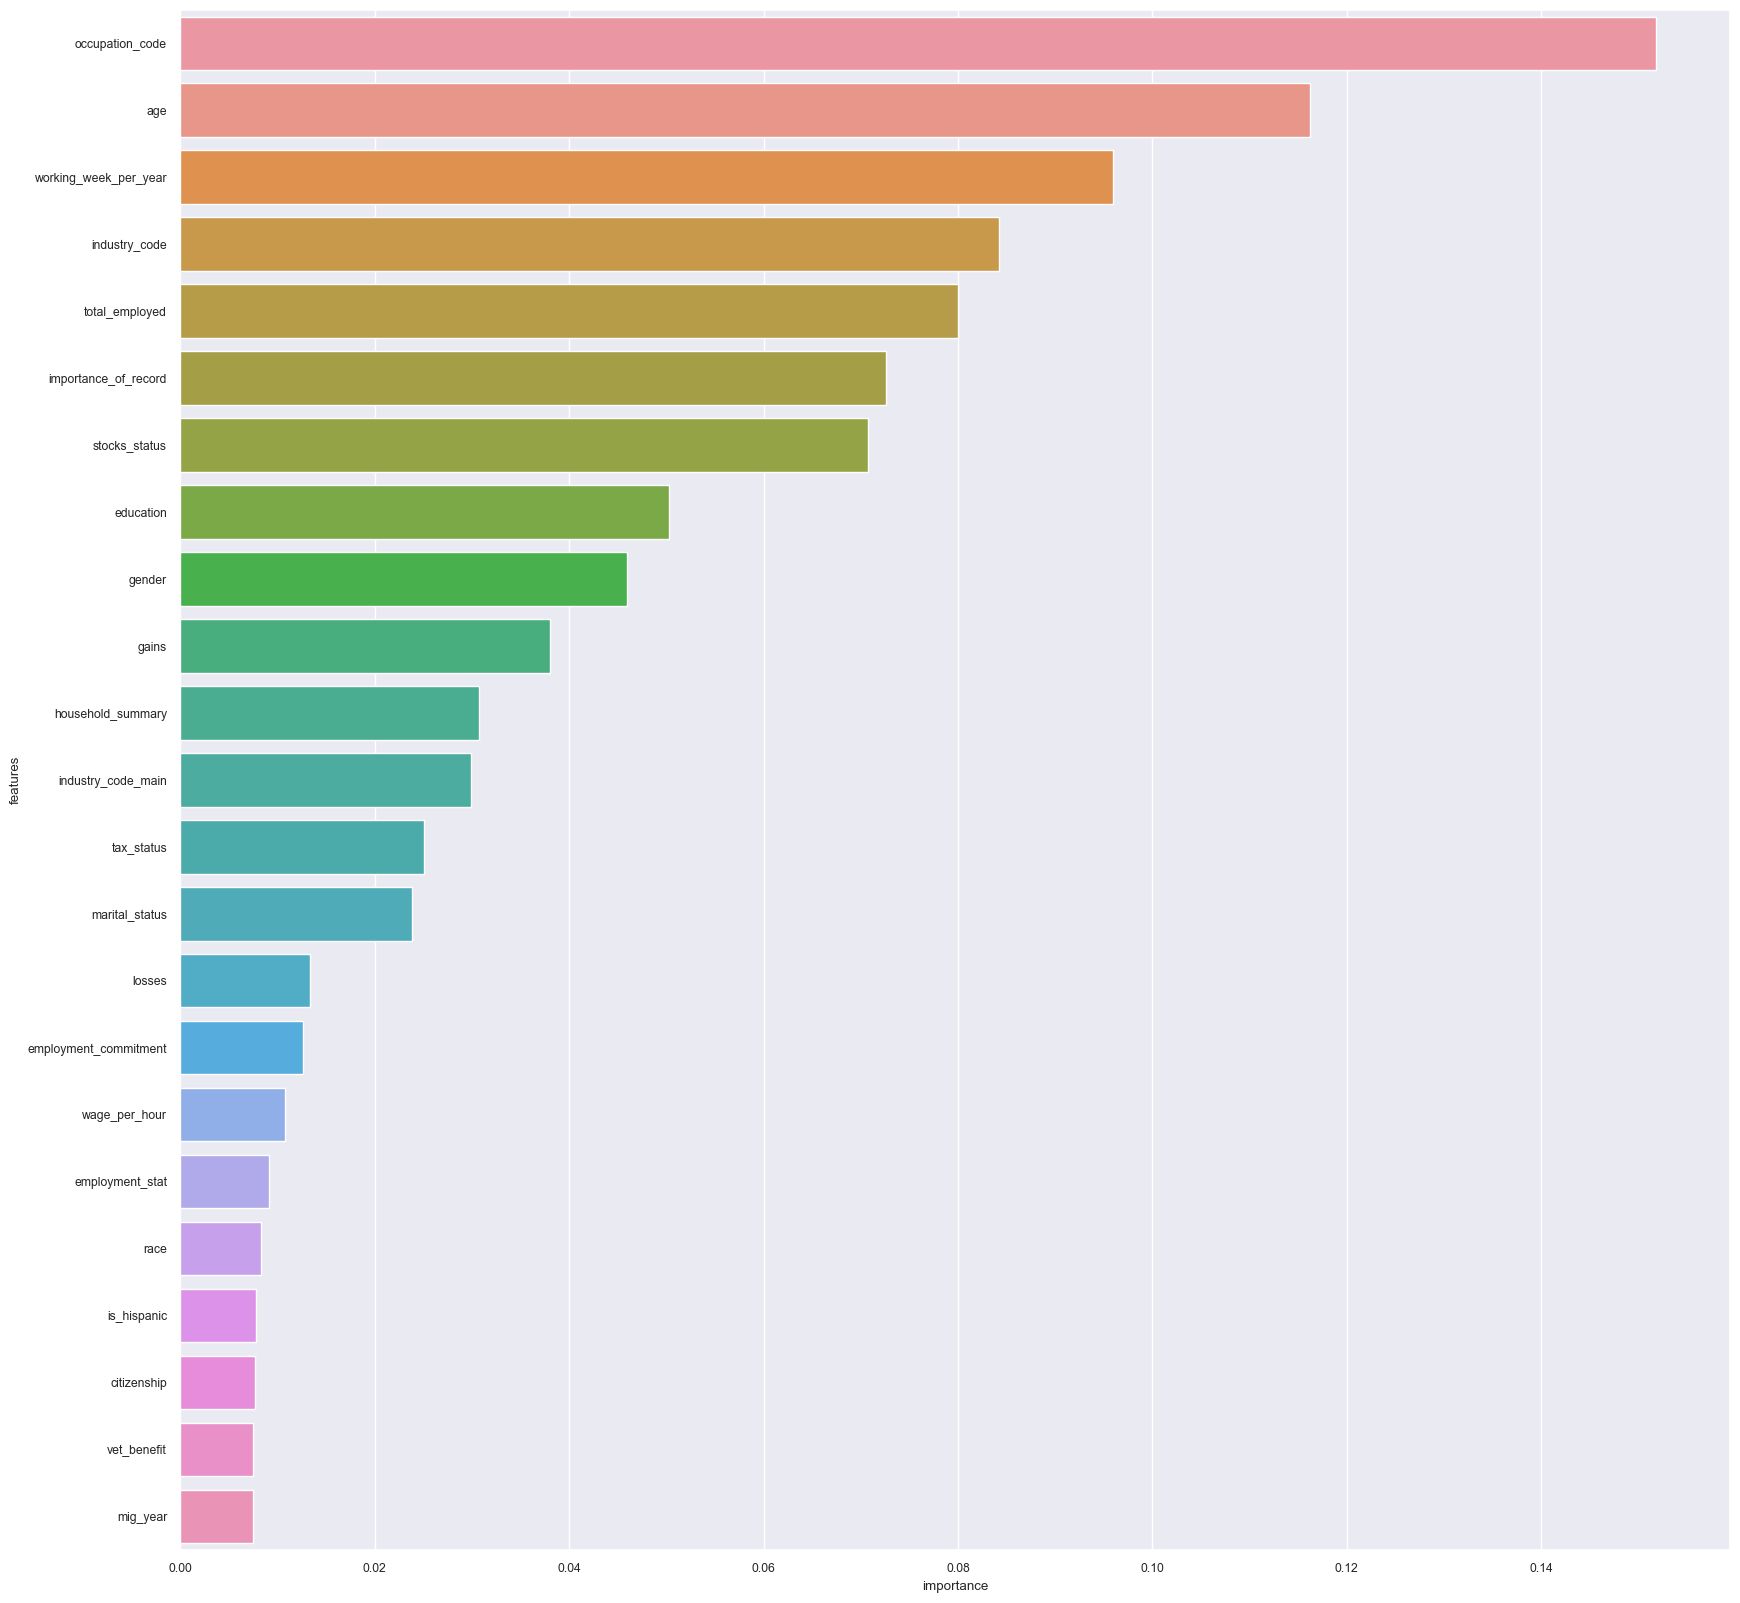

In [103]:
df_important=pd.DataFrame()
df_important['features']=X_train.columns
df_important['importance']=ran_for.feature_importances_
plt.figure(figsize=(20, 20))
sns.barplot(data=df_important.sort_values(by='importance', ascending=False), x='importance', y='features')

In [104]:
top10 = list(df_important.sort_values("importance", ascending=False)['features'].head(10).values)
top10

['occupation_code',
 'age',
 'working_week_per_year',
 'industry_code',
 'total_employed',
 'importance_of_record',
 'stocks_status',
 'education',
 'gender',
 'gains']

In [106]:
top10

['occupation_code',
 'age',
 'working_week_per_year',
 'industry_code',
 'total_employed',
 'importance_of_record',
 'stocks_status',
 'education',
 'gender',
 'gains']

In [107]:
df_top10=df[top10]
df_top10.head()

occupation_code  age  working_week_per_year  industry_code  total_employed  \
0                0   79                     52              0               2   
1                0   65                      0              0               0   
2               26   21                     15             41               4   
3                0    2                      0              0               0   
4                0   70                      0              0               0   

   importance_of_record  stocks_status  education  gender  gains  
0                 55690            273         12       0      0  
1                 76194              0         12       0      0  
2                 51881              0          2       1      0  
3                 39247              0         10       0      0  
4                 47108              0         12       1      0

In [109]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_top10, y, test_size=0.3, random_state=42)
print(X_train_new.shape, X_test_new.shape, y_train_new.shape, y_test_new.shape)

(146649, 10) (62850, 10) (146649,) (62850,)


In [110]:
ran_for.fit(X_train_new, y_train_new)

RandomForestClassifier(random_state=42)

In [111]:
y_pred_new = ran_for.predict(X_test_new)
score_new = accuracy_score(y_test_new, y_pred_new)
print("Accuracy: ", score_new)  

Accuracy:  0.9524582338902148


In [115]:
y_pred_new

array(['Below limit', 'Below limit', 'Below limit', ..., 'Below limit',
       'Below limit', 'Below limit'], dtype=object)

In [93]:
# Y_pred_ran_for=ran_for.predict(X_test_encoded)

In [96]:
# print('Random Forest Classifier:')
# print(accuracy_score(Y_test, Y_pred_ran_for))

Random Forest Classifier:
0.9879136397755753


In [95]:
# print(classification_report(Y_test, Y_pred_ran_for))

              precision    recall  f1-score   support

 Above limit       0.98      1.00      0.99     39023
 Below limit       1.00      0.98      0.99     39578

    accuracy                           0.99     78601
   macro avg       0.99      0.99      0.99     78601
weighted avg       0.99      0.99      0.99     78601



XGB classifier

In [104]:
xgb=XGBClassifier()
xgb.fit(X_train, Y_train_copy)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [105]:
Y_pred_xgb=xgb.predict(X_test)

In [107]:
print('XGB Classifier:')
print('F1 score:', round(f1_score(Y_test_copy, Y_pred_xgb), 2))

XGB Classifier:
F1 score: 0.91


In [109]:
print(classification_report(Y_test_copy, Y_pred_xgb))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     39578
           1       0.89      0.93      0.91     39023

    accuracy                           0.91     78601
   macro avg       0.91      0.91      0.91     78601
weighted avg       0.91      0.91      0.91     78601



Hyperparameter-tuning

In [116]:
gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train_new, y=y_train_new)

# A parameter grid for ETrees
params = {
    'n_estimators': range(100, 500, 100),
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini'],
    'max_depth': [5,11],
    'min_samples_split': [2,3],
}

extree_estimator = ExtraTreesClassifier()

gsearch = GridSearchCV(
    estimator= extree_estimator,
    param_grid= params,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf,
    verbose=1,
)


extree_model = gsearch.fit(X=X_train_new, y=y_train_new)
(gsearch.best_params_, gsearch.best_score_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


({'ccp_alpha': 0.0,
  'criterion': 'gini',
  'max_depth': 11,
  'min_samples_split': 3,
  'n_estimators': 200},
 0.9374424951869141)

In [117]:
extree_tuned = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                min_samples_split = 2,
                                class_weight = 'balanced',
                                max_depth = 15,
                                n_estimators = 200)

extree_tuned.fit(X_train_new, y_train_new)

ExtraTreesClassifier(class_weight='balanced', max_depth=15, n_estimators=200)

In [118]:
y_pred_new = ran_for.predict(X_test_new)
score_new = accuracy_score(y_test_new, y_pred_new)
print("Accuracy: ", score_new)  

Accuracy:  0.9524582338902148


EXPLAINABLE-AI

In [119]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [120]:
shap.initjs()

In [121]:
sample_set = X_train.sample(10)

In [122]:
explainer=shap.Explainer(ran_for)

In [123]:
shap_values_beeswarm = explainer(sample_set,check_additivity=False)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


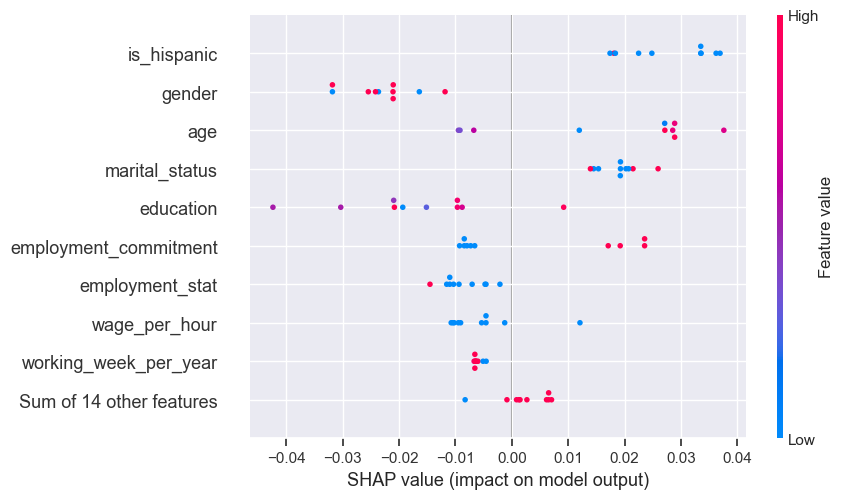

In [124]:
shap.plots.beeswarm(shap_values_beeswarm[:,:,0])

In [125]:
shap.plots.beeswarm(shap_values_beeswarm[:,:,1])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [126]:
choosen_instance = sample_set.iloc[0,:]
shap_values_fp = explainer.shap_values(choosen_instance)

In [127]:
shap.force_plot(explainer.expected_value[1], shap_values_fp[1], choosen_instance)

In [128]:
shap.force_plot(explainer.expected_value[0], shap_values_fp[0], choosen_instance)

In [129]:
choosen_instance2 = sample_set.iloc[0:5,:]
shap_values_fp_2 = explainer.shap_values(choosen_instance2)

In [130]:
shap.force_plot(explainer.expected_value[0], shap_values_fp_2[0], choosen_instance2,plot_cmap="DrDb")

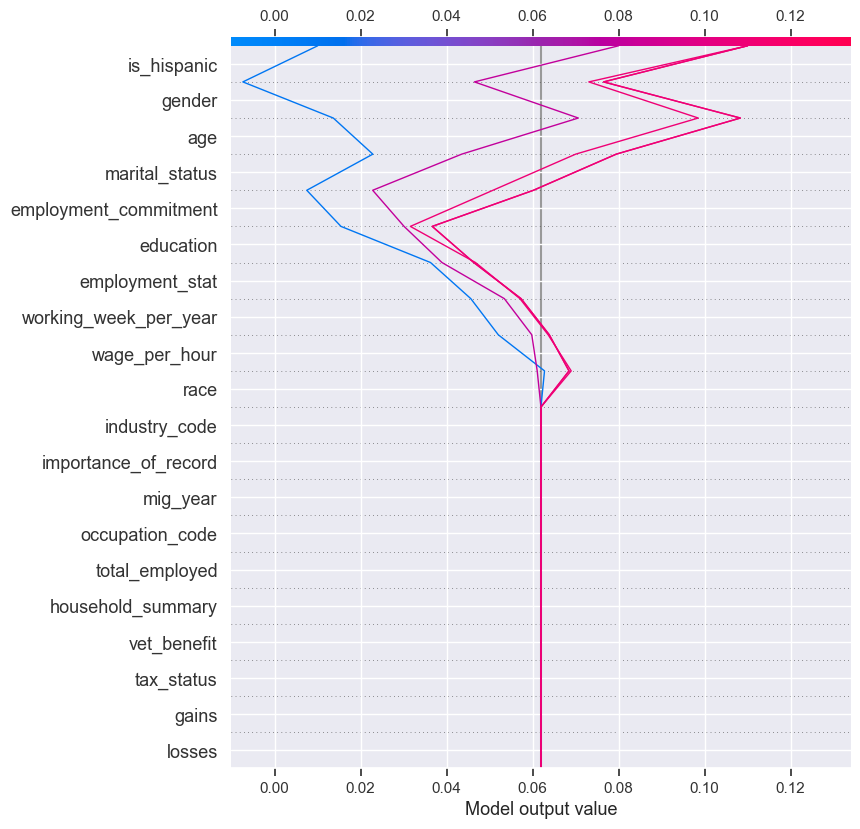

In [132]:
shap.decision_plot(explainer.expected_value[0], shap_values_fp_2[0],feature_names=list(X_train.columns))

SAVING THE MODEL

In [133]:
import joblib

In [134]:
joblib.dump(ran_for, 'ran_for_new.joblib')

['ran_for_new.joblib']

In [135]:
model=joblib.load('ran_for_new.joblib')

In [136]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [137]:
model.predict(X_test_new)

array(['Below limit', 'Below limit', 'Below limit', ..., 'Below limit',
       'Below limit', 'Below limit'], dtype=object)

In [120]:
# Get feature importances
#feature_importances = model.feature_importances_


In [121]:
#feature_importances

In [138]:
d=pd.read_csv("C:/TMLC/PROJECT 2/Dataset/Income.csv")

In [167]:
d['education'].nunique()

17